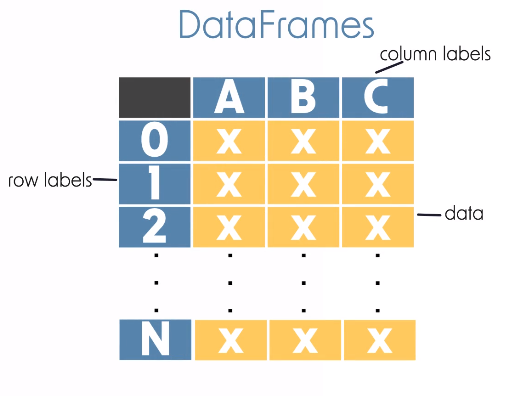

###  Creating a Dataframe

<b> DataFrame is spelt with D and F in caps

#### *Syntax*

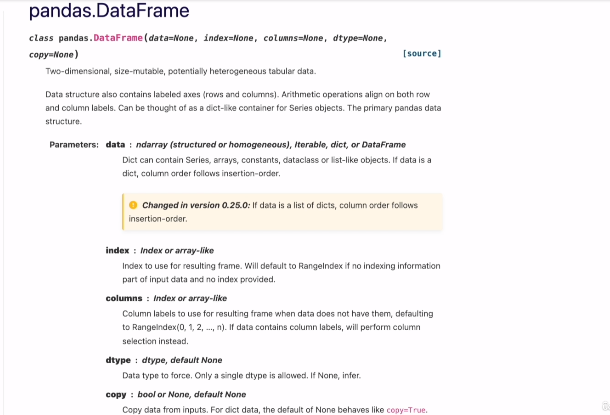

In [2]:
import pandas as pd

In [2]:
row_labels=[0,1,2,3,4]

In [3]:
column_labels=['A','B','C']

In [4]:
data = [[1,2,5],(4,2,4),{6,7,9},[3,2,4],[3,3,2]] 

# doesn't matter if the data is stored in lists or tuples or sets , it wil be read in all the same.
# the no. of entries MUST match the no. of columns.
# the no. of indices MUST match the no. of rows.

The above data has 3 entries per row and there are 5 rows. It is a 5x3 dataset.

In [5]:
df=pd.DataFrame(data,row_labels,column_labels)

In [6]:
df

,A,B,C
0,1,2,5
1,4,2,4
2,9,6,7
3,3,2,4
4,3,3,2


In [7]:
type(df)

pandas.core.frame.DataFrame

In [130]:
# Alternative dataframe creation 1

countries_data = pd.DataFrame({
    'Country': ['India', 'China', 'Japan'],
    'Region': ['Asia', 'Asia', 'Asia'],
    'Population': [1380000000, 1440000000, 126000000]
})


In [131]:
countries_data

,Country,Region,Population
0,India,Asia,1380000000
1,China,Asia,1440000000
2,Japan,Asia,126000000


In [68]:
# We can also use the explode method to create a dataframe.
column_index = ['A','B']
data_list = [[[1,2], 'nested list'],[2,'not a nested list'],[[1,2],'nested list 2']]

In [69]:
df=pd.DataFrame(data=data_list, columns=column_index)

In [70]:
df

,A,B
0,"[1, 2]",nested list
1,2,not a nested list
2,"[1, 2]",nested list 2


The explode method can transform every element in a row that contains embedded values to its own seperate row.

*Syntax*

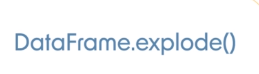

    Just pass in the column you wish to explode into the parenthesis

>df.explode(column='column_name')

In [71]:
df.explode(column='A')

,A,B
0,1,nested list
0,2,nested list
1,2,not a nested list
2,1,nested list 2
2,2,nested list 2


####  More DataFrame Methods

<u> 1. pd.set_index()

This is used when we want to set a specific column as the index.

*Syntax*

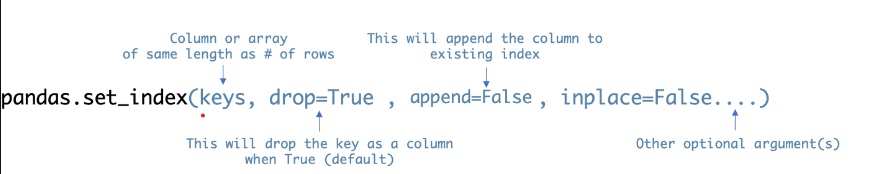

where:

* drop means the chosen column will be removed from the rest of the other columns and specifically remain an index column
* append means the column will be added into the existing index rather than replace it.
* inplace means the changes will override the existing dataframe.

In [8]:
df

,A,B,C
0,1,2,5
1,4,2,4
2,9,6,7
3,3,2,4
4,3,3,2


In [9]:
df.set_index('C') # The column name is a string thus is must be enclosed in quotation marks 

,A,B
C,,
5,1,2
4,4,2
7,9,6
4,3,2
2,3,3


In [10]:
df.set_index('C',drop=False)

,A,B,C
C,,,
5,1,2,5
4,4,2,4
7,9,6,7
4,3,2,4
2,3,3,2


In [11]:
df

,A,B,C
0,1,2,5
1,4,2,4
2,9,6,7
3,3,2,4
4,3,3,2


In [12]:
# The changes did not override the existing dataframe 
df.set_index('C',drop=False, inplace=True)

In [13]:
# Now the changes have been made on the existing dataset
df

,A,B,C
C,,,
5,1,2,5
4,4,2,4
7,9,6,7
4,3,2,4
2,3,3,2


In [14]:
df.set_index('B',drop=False, append=True)

,,A,B,C
C,B,,,
5,2,1,2,5
4,2,4,2,4
7,6,9,6,7
4,2,3,2,4
2,3,3,3,2


<u> 2. pd.rest_index()

This resets the index to default.

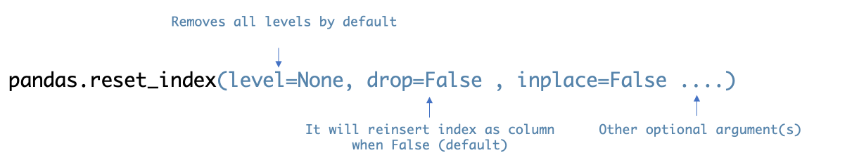

In [15]:
df

,A,B,C
C,,,
5,1,2,5
4,4,2,4
7,9,6,7
4,3,2,4
2,3,3,2


In [16]:
df.reset_index()

ValueError: cannot insert C, already exists

The error message is because drop=False and thus column C cannot be re-inserted as a column as it already exists. To solve this, we must drop the current C column so that the index column takes its place.

In [ ]:
df.reset_index(drop=True)

Now, column C has been returned back to being a column and is no longer an index.

In [ ]:
df

Nb:the change did not override the existing dataframe

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

Now it has.

### Importing data

 1. CSV files

*Syntax*

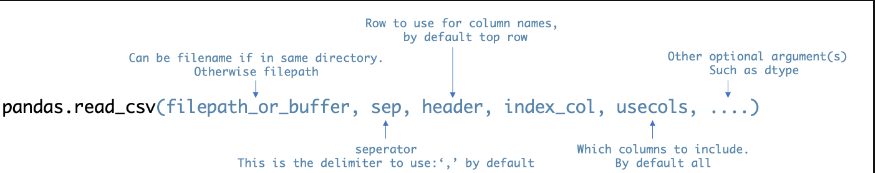

where:

* index_col sets the column you wish to be the index.

There are other inputting functions such as read_excel, read_stata and many more.

Click the below link for more.

input / output functions: https://pandas.pydata.org/docs/reference/io.html

In [21]:
countries_table=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/03 Introduction to DataFrames/top_10_countries.csv')

In [22]:
countries_table

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


In [23]:
# Let us make the rank the index column
countries_table=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/03 Introduction to DataFrames/top_10_countries.csv',index_col='Rank')

In [24]:
countries_table

,Country / Dependency,Region,Population,% of world,Date
Rank,,,,,
1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
3,United States,Americas,"333,073,186",4.20%,18-Jan-22
4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21


In [25]:
# We could have also used the column indices in stead of their names. The columns start from 0.
countries_table=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/03 Introduction to DataFrames/top_10_countries.csv',index_col=[0])

In [26]:
countries_table

,Country / Dependency,Region,Population,% of world,Date
Rank,,,,,
1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
3,United States,Americas,"333,073,186",4.20%,18-Jan-22
4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21


In [27]:
#Selecting only a few columns. NB: If you use both the index_col and  usecols arguements, the index column MUST be part of the columns selected.
countries_table=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/03 Introduction to DataFrames/top_10_countries.csv',index_col='Region',usecols=['Region','Date'])

In [28]:
countries_table

,Date
Region,
Asia,31-Dec-21
Asia,18-Jan-22
Americas,18-Jan-22
Asia,31-Dec-20
Asia,01-Jul-21
Americas,18-Jan-22
Africa,01-Jul-21
Asia,18-Jan-22
Europe,01-Jan-21


<b> What about files without the headers?

In [29]:
countries_table=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/03 Introduction to DataFrames/top_10_countries_no_header.csv')

In [30]:
countries_table

,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
0,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
1,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
2,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
3,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
4,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
5,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
6,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
7,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
8,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


In [32]:
# if we don't wish to create column names then it would be appropriate if we indicate header=None
countries_table=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/03 Introduction to DataFrames/top_10_countries_no_header.csv',header=None)

In [33]:
countries_table

,0,1,2,3,4,5
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


To assign column names we use the arguement names.

*Syntax*

names=["Column1", "Column2", "Column3"])

In [34]:
countries_table=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/03 Introduction to DataFrames/top_10_countries_no_header.csv',names=['Rank','Country / Dependency','Region','Population','% of world','Date'])

In [35]:
countries_table

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


Alternatively, we could modify the existing dataset.

*Syntax*

df.columns = ["ColumnA", "ColumnB", "ColumnC"]


In [36]:
countries_table.columns=['Rank','Country / Dependency','Region','Population','% of world','Date']

In [37]:
countries_table

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


## Selecting data 

### Selecting a single column

In [132]:
countries_data=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/03 Introduction to DataFrames/top_10_countries.csv')

In [41]:
countries_data

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


In [42]:
countries_data['Region']

0        Asia
1        Asia
2    Americas
3        Asia
4        Asia
5    Americas
6      Africa
7        Asia
8      Europe
9    Americas
Name: Region, dtype: object

In [43]:
type(countries_data['Region'])

pandas.core.series.Series

Recall that a dataframe is a collection of series.

### Selecting multiple columns

In [53]:
# Use an embedded list
countries_data[['Rank','Country / Dependency','Region']] # The spacing counts as characters so you have to be very careful as you quote the column names

,Rank,Country / Dependency,Region
0,1,China,Asia
1,2,India,Asia
2,3,United States,Americas
3,4,Indonesia[b],Asia
4,5,Pakistan,Asia
5,6,Brazil,Americas
6,7,Nigeria,Africa
7,8,Bangladesh,Asia
8,9,Russia[b],Europe
9,10,Mexico,Americas


### Selecting multiple rows

In [71]:
# To select rows just reference their exact row indexes using [start:stop: step]. However, this method is most suitable if you want continuous rows. 
countries_data[0:5:2]

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21


### Selecting a single row

In [90]:
countries_data[0:1]
# It is the same but with the stop and step parameter adjusted accordingly

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21


<b>Alternatively , we could use .iloc

### Selecting rows and columns

This can be done using: 
>dataset_name.iloc[row_index,column_index]

* Recall, the row and column indices start from 0.
* If you don't specify the columns then all the columns will be brought back. The converse is not true. This code only works if row(s) are specified. 

In [72]:
countries_data

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


In [80]:
# The first row
countries_data.iloc[0]

Rank                                1
Country / Dependency            China
Region                           Asia
Population              1,412,600,000
% of world                     17.80%
Date                        31-Dec-21
Name: 0, dtype: object

In [94]:
# To extract multiple rows use dataframe.iloc[start_row_index:stop_row_index].
countries_data.iloc[3:]

,Rank,Country / Dependency,Region,Population,% of world,Date
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


In [95]:
# We can also reverse the ordering of the rows by using -1 as the step parameter
countries_data.iloc[::-1]

,Rank,Country / Dependency,Region,Population,% of world,Date
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21


In [97]:
countries_data

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


In [96]:
# Let us tru returning the population value for the United States
countries_data.iloc[2,3]

'333,073,186'

The 10-th country has become the first and vice versa.

### Getting specific ranges of columns and rows

*Syntax*

>dataframe_name.iloc[row_start:row_stop, column_start:column_stop]

In [100]:
countries_data.iloc[2:,1:4]
# from the third row to the last and from the second column to the fourth

,Country / Dependency,Region,Population
2,United States,Americas,"333,073,186"
3,Indonesia[b],Asia,"271,350,000"
4,Pakistan,Asia,"225,200,000"
5,Brazil,Americas,"214,231,641"
6,Nigeria,Africa,"211,401,000"
7,Bangladesh,Asia,"172,062,576"
8,Russia[b],Europe,"146,171,015"
9,Mexico,Americas,"126,014,024"


<b>.loc is similar to .iloc except that it uses the label names in stead of the indexes.

In [101]:
countries_data

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


In [102]:
countries_data.loc[2,'Country / Dependency']

'\xa0United States'

The .loc also allows for slicing.

In [103]:
countries_data.loc[2,'Country / Dependency':'Date']

Country / Dependency     United States
Region                        Americas
Population                 333,073,186
% of world                       4.20%
Date                         18-Jan-22
Name: 2, dtype: object

In [104]:
countries_data.loc[2:3,'Country / Dependency':'Date']

,Country / Dependency,Region,Population,% of world,Date
2,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20


<b>We can add non-contiguous labels by using embedded lists.

In [105]:
countries_data.loc[2:3,['Country / Dependency','Date']]

,Country / Dependency,Date
2,United States,18-Jan-22
3,Indonesia[b],31-Dec-20


### Conditional Selection

In [106]:
countries_data

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
2,3,United States,Americas,"333,073,186",4.20%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
5,6,Brazil,Americas,"214,231,641",2.70%,18-Jan-22
6,7,Nigeria,Africa,"211,401,000",2.67%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22
8,9,Russia[b],Europe,"146,171,015",1.84%,01-Jan-21
9,10,Mexico,Americas,"126,014,024",1.59%,02-Mar-20


In [107]:
countries_data=='Asia'

,Rank,Country / Dependency,Region,Population,% of world,Date
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,True,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [108]:
countries_data[countries_data=='Asia']

,Rank,Country / Dependency,Region,Population,% of world,Date
0,NaN,NaN,Asia,NaN,NaN,NaN
1,NaN,NaN,Asia,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Asia,NaN,NaN,NaN
4,NaN,NaN,Asia,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Asia,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Now, specifying we want Region inside countries_data to be equal to Asia.
countries_data[countries_data['Region']=='Asia']

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,"1,412,600,000",17.80%,31-Dec-21
1,2,India,Asia,"1,386,946,912",17.50%,18-Jan-22
3,4,Indonesia[b],Asia,"271,350,000",3.42%,31-Dec-20
4,5,Pakistan,Asia,"225,200,000",2.84%,01-Jul-21
7,8,Bangladesh,Asia,"172,062,576",2.17%,18-Jan-22


#### Multiple conditions

To apply multiple filters we enclose each condition in round brackets() and use the amperstand sign & to represent and. We use the straight slash | to represent or

*Syntax*

> dataframe_name[(condition1) & (condition2)]

> dataframe_name[(condition1) | (condition2)]

In [140]:
countries_data[(countries_data['Region'] == 'Asia') & (countries_data.iloc[3] > 30000000)]

TypeError: '>' not supported between instances of 'str' and 'int'

In [129]:
type(countries_data['Population'])

pandas.core.series.Series

Since the columns of this data are series and not integers hence why we get the error. To solve it we must make the Population column and integer. The easiest way would be to go back to excel and change it there.

In [147]:
# Importing the edited dataset

In [158]:
countries_data=pd.read_csv('C:/Users/ADMIN/Desktop/MY COURSES/PYTHON KNOWLEDGE/Course Resurces-Python for Data Analysis and Visualization/09 Pandas/04 Selecting Data 1/new_top_10_countries.csv')

In [159]:
countries_data

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
5,6,Brazil,Americas,214231641,2.70%,18 Jan 22
6,7,Nigeria,Africa,211401000,2.67%,1 Jul 21
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22
8,9,Russia[b],Europe,146171015,1.84%,1 Jan 21
9,10,Mexico,Americas,126014024,1.59%,2 Mar 20


In [152]:
countries_data[(countries_data['Region'] == 'Asia') & (countries_data['Population'] > 300000000)]

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22


In [156]:
countries_data[(countries_data['Region']=='Asia') & (countries_data['Date']== '31 Dec 21')]

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21


In [157]:
countries_data[(countries_data['Region'] == 'Asia') | (countries_data['Population'] > 300000000)]

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22


In [160]:
# We can select columns in the exact same way from the filtered dataset
countries_data[(countries_data['Region'] == 'Asia') | (countries_data['Population'] > 300000000)][['Rank','Country / Dependency']]

,Rank,Country / Dependency
0,1,China
1,2,India
2,3,United States
3,4,Indonesia[b]
4,5,Pakistan
7,8,Bangladesh


<b> .head( ) and .tail( )

* head() shows the first 5 rows and the columns.
* tail() shoes the last 5 rows and the columns.

In [161]:
countries_data

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
5,6,Brazil,Americas,214231641,2.70%,18 Jan 22
6,7,Nigeria,Africa,211401000,2.67%,1 Jul 21
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22
8,9,Russia[b],Europe,146171015,1.84%,1 Jan 21
9,10,Mexico,Americas,126014024,1.59%,2 Mar 20


In [164]:
countries_data.head()

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21


In [166]:
# Within the first 5 rows, we can also select rows we want
countries_data.head(2)

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22


Also, with the head and tail methods, we are able to call a dataframe with certain rows removed.

In [170]:
# The last row is removed
countries_data.head(-1)

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
5,6,Brazil,Americas,214231641,2.70%,18 Jan 22
6,7,Nigeria,Africa,211401000,2.67%,1 Jul 21
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22
8,9,Russia[b],Europe,146171015,1.84%,1 Jan 21


In [171]:
# The last two rows are removed.
countries_data.head(-2)

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
5,6,Brazil,Americas,214231641,2.70%,18 Jan 22
6,7,Nigeria,Africa,211401000,2.67%,1 Jul 21
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22


In [174]:
# The first row is removed.
countries_data.tail(-1)

,Rank,Country / Dependency,Region,Population,% of world,Date
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
5,6,Brazil,Americas,214231641,2.70%,18 Jan 22
6,7,Nigeria,Africa,211401000,2.67%,1 Jul 21
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22
8,9,Russia[b],Europe,146171015,1.84%,1 Jan 21
9,10,Mexico,Americas,126014024,1.59%,2 Mar 20


In [173]:
# The first two rows are removed
countries_data.tail(-2)

,Rank,Country / Dependency,Region,Population,% of world,Date
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
5,6,Brazil,Americas,214231641,2.70%,18 Jan 22
6,7,Nigeria,Africa,211401000,2.67%,1 Jul 21
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22
8,9,Russia[b],Europe,146171015,1.84%,1 Jan 21
9,10,Mexico,Americas,126014024,1.59%,2 Mar 20


### Selecting rows or columns that match a list of potential values

To do this we use .isin()

*Syntax*

>dataframe_name[column_we_wish_to_check_against].isin( [list of values] )

In [178]:
countries_data['Region'].isin(['Asia','Americas'])

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
8    False
9     True
Name: Region, dtype: bool

In [179]:
countries_data[countries_data['Region'].isin(['Asia','Americas'])]

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
5,6,Brazil,Americas,214231641,2.70%,18 Jan 22
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22
9,10,Mexico,Americas,126014024,1.59%,2 Mar 20


In [180]:
# It does the same job as
countries_data[(countries_data['Region']=='Asia') |(countries_data['Region']=='Americas')]

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31 Dec 21
1,2,India,Asia,1386946912,17.50%,18 Jan 22
2,3,United States,Americas,333073186,4.20%,18 Jan 22
3,4,Indonesia[b],Asia,271350000,3.42%,31 Dec 20
4,5,Pakistan,Asia,225200000,2.84%,1 Jul 21
5,6,Brazil,Americas,214231641,2.70%,18 Jan 22
7,8,Bangladesh,Asia,172062576,2.17%,18 Jan 22
9,10,Mexico,Americas,126014024,1.59%,2 Mar 20


In [181]:
# To reverse the condition such that the dataframe that is displayed brings all values expecpt those that satisfy the condition,
# we insert the tilde sign in front of query inside the outer square brackets.

In [182]:
countries_data[~countries_data['Region'].isin(['Asia','Americas'])]

,Rank,Country / Dependency,Region,Population,% of world,Date
6,7,Nigeria,Africa,211401000,2.67%,1 Jul 21
8,9,Russia[b],Europe,146171015,1.84%,1 Jan 21


In [184]:
# it is the same as
countries_data[(countries_data['Region']!='Asia') & (countries_data['Region']!='Americas')]

,Rank,Country / Dependency,Region,Population,% of world,Date
6,7,Nigeria,Africa,211401000,2.67%,1 Jul 21
8,9,Russia[b],Europe,146171015,1.84%,1 Jan 21


## Data manipulation

In [185]:
import pandas as pd

In [259]:
# For windows users, placing r before the file path means we don't have to change the slashes. 
countries_df=pd.read_csv(r'C:\Users\ADMIN\Desktop\MY COURSES\PYTHON KNOWLEDGE\Course Resurces-Python for Data Analysis and Visualization\09 Pandas\06 Data Manipulation 1\top_10_countries.csv')

In [187]:
countries_df

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31-Dec-21
1,2,India,Asia,1386946912,17.50%,18-Jan-22
2,3,United States,Americas,333073186,4.20%,18-Jan-22
3,4,Indonesia,Asia,271350000,3.42%,31-Dec-20
4,5,Pakistan,Asia,225200000,2.84%,01-Jul-21
5,6,Brazil,Americas,214231641,2.70%,18-Jan-22
6,7,Nigeria,Africa,211401000,2.67%,01-Jul-21
7,8,Bangladesh,Asia,172062576,2.17%,18-Jan-22
8,9,Russia,Europe,146171015,1.84%,01-Jan-21
9,10,Mexico,Americas,126014024,1.59%,02-Mar-20


In [191]:
# To check the shape of a dataframe use the following code
countries_df.shape

(10, 6)

This dataset has 10 rows and 6 columns.

In [192]:
# To check the columns of a dataset, we can use the following code
countries_df.columns

Index(['Rank', 'Country / Dependency', 'Region', 'Population', '% of world',
       'Date'],
      dtype='object')

In [193]:
# To check the index of a dataset, we can use the following code
countries_df.index

RangeIndex(start=0, stop=10, step=1)

<b>The index goes from 0-9, the stop is not included.

### <b>Renaming columns

*Syntax*

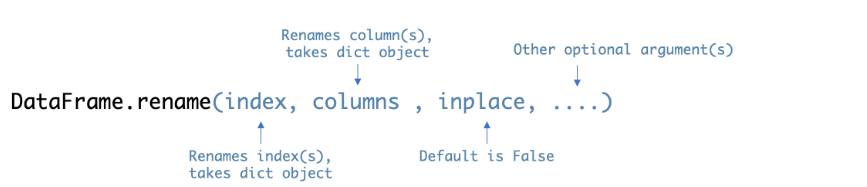

<b>where columns= {old_name1:new_name1,old_name2:new_name2,etc]

In [198]:
# To get a reminder of the arguements, just run the cell without inserting arguements. The highlighted text in th error message
# contains the potential arguements to use
countries_df.rename()

TypeError: must pass an index to rename

In [260]:
countries_df.rename(columns={'Country / Dependency' : 'Countries'}, inplace=True)

In [211]:
countries_df

,Rank,Country,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31-Dec-21
1,2,India,Asia,1386946912,17.50%,18-Jan-22
2,3,United States,Americas,333073186,4.20%,18-Jan-22
3,4,Indonesia,Asia,271350000,3.42%,31-Dec-20
4,5,Pakistan,Asia,225200000,2.84%,01-Jul-21
5,6,Brazil,Americas,214231641,2.70%,18-Jan-22
6,7,Nigeria,Africa,211401000,2.67%,01-Jul-21
7,8,Bangladesh,Asia,172062576,2.17%,18-Jan-22
8,9,Russia,Europe,146171015,1.84%,01-Jan-21
9,10,Mexico,Americas,126014024,1.59%,02-Mar-20


In [261]:
#  Renaming multiple columns
countries_df.rename(columns={'Countries' : 'Country','Date':'Dates'}, inplace=True)

In [214]:
countries_df

,Rank,Country / Dependency,Region,Population,% of world,Dates
0,1,China,Asia,1412600000,17.80%,31-Dec-21
1,2,India,Asia,1386946912,17.50%,18-Jan-22
2,3,United States,Americas,333073186,4.20%,18-Jan-22
3,4,Indonesia,Asia,271350000,3.42%,31-Dec-20
4,5,Pakistan,Asia,225200000,2.84%,01-Jul-21
5,6,Brazil,Americas,214231641,2.70%,18-Jan-22
6,7,Nigeria,Africa,211401000,2.67%,01-Jul-21
7,8,Bangladesh,Asia,172062576,2.17%,18-Jan-22
8,9,Russia,Europe,146171015,1.84%,01-Jan-21
9,10,Mexico,Americas,126014024,1.59%,02-Mar-20


### <b> Dropping columns

*Syntax*

The drop method is used to drop indices, axis, columns and so on.

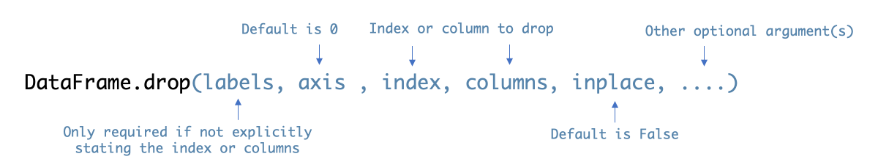

In [241]:
countries_df

,Rank,Country,Region,Population,% of world
0,1,China,Asia,1412600000,17.80%
1,2,India,Asia,1386946912,17.50%
2,3,United States,Americas,333073186,4.20%
3,4,Indonesia,Asia,271350000,3.42%
4,5,Pakistan,Asia,225200000,2.84%
5,6,Brazil,Americas,214231641,2.70%
6,7,Nigeria,Africa,211401000,2.67%
7,8,Bangladesh,Asia,172062576,2.17%
8,9,Russia,Europe,146171015,1.84%
9,10,Mexico,Americas,126014024,1.59%


 This code: 'countries_df.drop(labels='Dates',axis=1,inplace=True)' does the same job as the code below

In [262]:
countries_df.drop(columns='Dates', inplace=True)

In [218]:
countries_df

,Rank,Country / Dependency,Region,Population,% of world
0,1,China,Asia,1412600000,17.80%
1,2,India,Asia,1386946912,17.50%
2,3,United States,Americas,333073186,4.20%
3,4,Indonesia,Asia,271350000,3.42%
4,5,Pakistan,Asia,225200000,2.84%
5,6,Brazil,Americas,214231641,2.70%
6,7,Nigeria,Africa,211401000,2.67%
7,8,Bangladesh,Asia,172062576,2.17%
8,9,Russia,Europe,146171015,1.84%
9,10,Mexico,Americas,126014024,1.59%


<b>You can perform arthimetic operations on columns that have a numeric data-type

In [219]:
countries_df['Population']

0    1412600000
1    1386946912
2     333073186
3     271350000
4     225200000
5     214231641
6     211401000
7     172062576
8     146171015
9     126014024
Name: Population, dtype: int64

In [221]:
# Let us make the above entries into a class of millions and make it into 2 decimal places.
round(countries_df['Population']/1000000,2)

0    1412.60
1    1386.95
2     333.07
3     271.35
4     225.20
5     214.23
6     211.40
7     172.06
8     146.17
9     126.01
Name: Population, dtype: float64

<b>We can assign new columns by referencing them as if they already existed.

In [242]:
countries_df['Population (millions)']=round(countries_df['Population']/1000000,2)

In [243]:
countries_df

,Rank,Country,Region,Population,% of world,Population (millions)
0,1,China,Asia,1412600000,17.80%,1412.60
1,2,India,Asia,1386946912,17.50%,1386.95
2,3,United States,Americas,333073186,4.20%,333.07
3,4,Indonesia,Asia,271350000,3.42%,271.35
4,5,Pakistan,Asia,225200000,2.84%,225.20
5,6,Brazil,Americas,214231641,2.70%,214.23
6,7,Nigeria,Africa,211401000,2.67%,211.40
7,8,Bangladesh,Asia,172062576,2.17%,172.06
8,9,Russia,Europe,146171015,1.84%,146.17
9,10,Mexico,Americas,126014024,1.59%,126.01


In [263]:
# let us create a new column names 'Country/Region' that contains the Country and Region concatenated.
countries_df['Country / Region']= countries_df['Country']+ ' / ' + countries_df['Region']

In [264]:
countries_df

,Rank,Country,Region,Population,% of world,Country / Region
0,1,China,Asia,1412600000,17.80%,China / Asia
1,2,India,Asia,1386946912,17.50%,India / Asia
2,3,United States,Americas,333073186,4.20%,United States / Americas
3,4,Indonesia,Asia,271350000,3.42%,Indonesia / Asia
4,5,Pakistan,Asia,225200000,2.84%,Pakistan / Asia
5,6,Brazil,Americas,214231641,2.70%,Brazil / Americas
6,7,Nigeria,Africa,211401000,2.67%,Nigeria / Africa
7,8,Bangladesh,Asia,172062576,2.17%,Bangladesh / Asia
8,9,Russia,Europe,146171015,1.84%,Russia / Europe
9,10,Mexico,Americas,126014024,1.59%,Mexico / Americas


### <b> Takeway: *if two columns are of a similar data-type the usual data-type operations can be performed.*

### Checking the datatype of each column.

We can do this using the dtypes attribute.

In [250]:
countries_df.dtypes

Rank                       int64
Country                   object
Region                    object
Population                 int64
% of world                object
Population (millions)    float64
Country / Region          object
dtype: object

Let us try to change the % of world data-type from object to float. 

*Syntax*

>dataframe['column'].astype( pandas/numpy_data_type_you_wish_it_to_be )

In [267]:
countries_df['% of world'].astype(float)

ValueError: could not convert string to float: '17.80%'

In [268]:
countries_df['% of world']

0    17.80%
1    17.50%
2     4.20%
3     3.42%
4     2.84%
5     2.70%
6     2.67%
7     2.17%
8     1.84%
9     1.59%
Name: % of world, dtype: object

The error message is because this column has entries with the percent sign and for us to transform it we must first remove the % from the entries.

Recall

In [271]:
'17.80%'[:-1]

'17.80'

<b> There exists a method that can be used to apply a function to all elements in a column.

*Syntax*

>dataframe['column'].apply(function)

<i>the default axis is 0

In [275]:
def remove_pct(x):
        return x[:-1]

In [277]:
# let us test if our function works.
remove_pct('17.80%')

'17.80'

In [280]:
countries_df['% of world'].apply(remove_pct)

0    17.80
1    17.50
2     4.20
3     3.42
4     2.84
5     2.70
6     2.67
7     2.17
8     1.84
9     1.59
Name: % of world, dtype: object

In [282]:
# Alternatively, we could have used a lambda function.
countries_df['% of world'].apply(lambda x:x[:-1])

0    17.80
1    17.50
2     4.20
3     3.42
4     2.84
5     2.70
6     2.67
7     2.17
8     1.84
9     1.59
Name: % of world, dtype: object

In [284]:
# We still need to assign this to the column for the changes to take place in the dataframe
countries_df

,Rank,Country,Region,Population,% of world,Country / Region
0,1,China,Asia,1412600000,17.80%,China / Asia
1,2,India,Asia,1386946912,17.50%,India / Asia
2,3,United States,Americas,333073186,4.20%,United States / Americas
3,4,Indonesia,Asia,271350000,3.42%,Indonesia / Asia
4,5,Pakistan,Asia,225200000,2.84%,Pakistan / Asia
5,6,Brazil,Americas,214231641,2.70%,Brazil / Americas
6,7,Nigeria,Africa,211401000,2.67%,Nigeria / Africa
7,8,Bangladesh,Asia,172062576,2.17%,Bangladesh / Asia
8,9,Russia,Europe,146171015,1.84%,Russia / Europe
9,10,Mexico,Americas,126014024,1.59%,Mexico / Americas


In [288]:
countries_df['% of world']=countries_df['% of world'].apply(lambda x:x[:-1])

In [289]:
countries_df

,Rank,Country,Region,Population,% of world,Country / Region
0,1,China,Asia,1412600000,17.80,China / Asia
1,2,India,Asia,1386946912,17.50,India / Asia
2,3,United States,Americas,333073186,4.20,United States / Americas
3,4,Indonesia,Asia,271350000,3.42,Indonesia / Asia
4,5,Pakistan,Asia,225200000,2.84,Pakistan / Asia
5,6,Brazil,Americas,214231641,2.70,Brazil / Americas
6,7,Nigeria,Africa,211401000,2.67,Nigeria / Africa
7,8,Bangladesh,Asia,172062576,2.17,Bangladesh / Asia
8,9,Russia,Europe,146171015,1.84,Russia / Europe
9,10,Mexico,Americas,126014024,1.59,Mexico / Americas


In [291]:
# Now, we can change the datatype
countries_df['% of world'].astype(float)

0    17.80
1    17.50
2     4.20
3     3.42
4     2.84
5     2.70
6     2.67
7     2.17
8     1.84
9     1.59
Name: % of world, dtype: float64

In [293]:
# Let us save the change
countries_df['% of world']=countries_df['% of world'].astype(float)

In [294]:
countries_df.dtypes

Rank                  int64
Country              object
Region               object
Population            int64
% of world          float64
Country / Region     object
dtype: object

In [299]:
countries_df['World Population']=countries_df['Population']/(countries_df['% of world']/100)

In [300]:
countries_df

,Rank,Country,Region,Population,% of world,Country / Region,World Population
0,1,China,Asia,1412600000,17.80,China / Asia,7.935955e+09
1,2,India,Asia,1386946912,17.50,India / Asia,7.925411e+09
2,3,United States,Americas,333073186,4.20,United States / Americas,7.930314e+09
3,4,Indonesia,Asia,271350000,3.42,Indonesia / Asia,7.934211e+09
4,5,Pakistan,Asia,225200000,2.84,Pakistan / Asia,7.929577e+09
5,6,Brazil,Americas,214231641,2.70,Brazil / Americas,7.934505e+09
6,7,Nigeria,Africa,211401000,2.67,Nigeria / Africa,7.917640e+09
7,8,Bangladesh,Asia,172062576,2.17,Bangladesh / Asia,7.929151e+09
8,9,Russia,Europe,146171015,1.84,Russia / Europe,7.944077e+09
9,10,Mexico,Americas,126014024,1.59,Mexico / Americas,7.925410e+09


Most times a cleaner code is appreciated.

In [301]:
x = countries_df['Population']

In [302]:
y = (countries_df['% of world']/100)

In [303]:
countries_df['World Pop']=x/y

In [304]:
countries_df

,Rank,Country,Region,Population,% of world,Country / Region,World Population,World Pop
0,1,China,Asia,1412600000,17.80,China / Asia,7.935955e+09,7.935955e+09
1,2,India,Asia,1386946912,17.50,India / Asia,7.925411e+09,7.925411e+09
2,3,United States,Americas,333073186,4.20,United States / Americas,7.930314e+09,7.930314e+09
3,4,Indonesia,Asia,271350000,3.42,Indonesia / Asia,7.934211e+09,7.934211e+09
4,5,Pakistan,Asia,225200000,2.84,Pakistan / Asia,7.929577e+09,7.929577e+09
5,6,Brazil,Americas,214231641,2.70,Brazil / Americas,7.934505e+09,7.934505e+09
6,7,Nigeria,Africa,211401000,2.67,Nigeria / Africa,7.917640e+09,7.917640e+09
7,8,Bangladesh,Asia,172062576,2.17,Bangladesh / Asia,7.929151e+09,7.929151e+09
8,9,Russia,Europe,146171015,1.84,Russia / Europe,7.944077e+09,7.944077e+09
9,10,Mexico,Americas,126014024,1.59,Mexico / Americas,7.925410e+09,7.925410e+09


In [29]:
tfl_df=pd.read_csv(r'C:\Users\ADMIN\Desktop\MY COURSES\PYTHON KNOWLEDGE\Course Resurces-Python for Data Analysis and Visualization\09 Pandas\07 Data Manipulation 2\tfl-daily-cycle-hires.csv')

In [3]:
tfl_df

,Day,Number of Bicycle Hires,Unnamed: 2
0,30/07/2010,6897.0,NaN
1,31/07/2010,5564.0,NaN
2,01/08/2010,4303.0,NaN
3,02/08/2010,6642.0,NaN
4,03/08/2010,7966.0,NaN
...,...,...,...
4076,26/09/2021,45120.0,NaN
4077,27/09/2021,32167.0,NaN
4078,28/09/2021,32539.0,NaN
4079,29/09/2021,39889.0,NaN


In [307]:
tfl_df.shape

(4081, 3)

In [308]:
tfl_df.dtypes

Day                         object
Number of Bicycle Hires    float64
Unnamed: 2                 float64
dtype: object

In [30]:
# Lets us delete the Unnamed: 2 column 
tfl_df.drop(columns='Unnamed: 2',inplace=True)

In [7]:
tfl_df

,Day,Number of Bicycle Hires
0,30/07/2010,6897.0
1,31/07/2010,5564.0
2,01/08/2010,4303.0
3,02/08/2010,6642.0
4,03/08/2010,7966.0
...,...,...
4076,26/09/2021,45120.0
4077,27/09/2021,32167.0
4078,28/09/2021,32539.0
4079,29/09/2021,39889.0


Let us convert the Day column to be a date data-type.

Info on date data-types

* to_datetime: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
* Date formatting: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
* Datetime module: https://docs.python.org/3/library/datetime.html
* strftime: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
* transpose: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
* explode: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

In [10]:
# First let us define the format it takes
"%d/%m/%Y"

'%d/%m/%Y'

This you can get from the date formatting resource

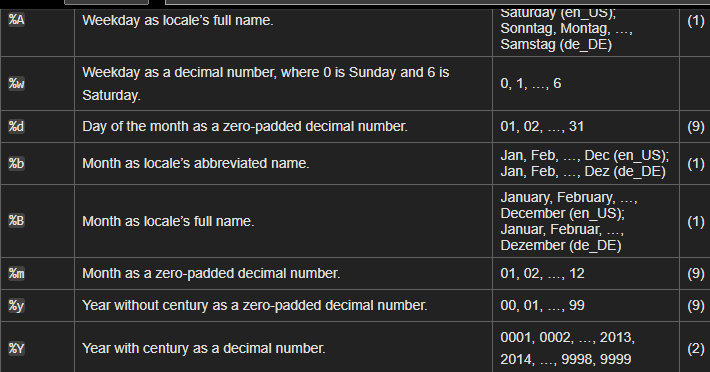

In [11]:
# The next step is to create a function and use the apply method to that column
# The datetime function is in the date library
from datetime import datetime 

In [ ]:
# creating the function that converts a string to a date
lambda x:datetime.strptime(x,"%d/%m/%Y")

In [13]:
# now we apply the function
tfl_df['Day'].apply(lambda x:datetime.strptime(x,"%d/%m/%Y"))

0      2010-07-30
1      2010-07-31
2      2010-08-01
3      2010-08-02
4      2010-08-03
          ...    
4076   2021-09-26
4077   2021-09-27
4078   2021-09-28
4079   2021-09-29
4080   2021-09-30
Name: Day, Length: 4081, dtype: datetime64[ns]

In [14]:
#replacing the old column
tfl_df['Day']=tfl_df['Day'].apply(lambda x:datetime.strptime(x,"%d/%m/%Y"))

In [15]:
tfl_df

,Day,Number of Bicycle Hires
0,2010-07-30,6897.0
1,2010-07-31,5564.0
2,2010-08-01,4303.0
3,2010-08-02,6642.0
4,2010-08-03,7966.0
...,...,...
4076,2021-09-26,45120.0
4077,2021-09-27,32167.0
4078,2021-09-28,32539.0
4079,2021-09-29,39889.0


In [23]:
tfl_df.dtypes

Day                        datetime64[ns]
Number of Bicycle Hires           float64
dtype: object

In [27]:
# Alternative method would be to run
tfl_df['Day']=tfl_df['Day'].astype('datetime64[ns]')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10188\2994918088.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tfl_df['Day']=tfl_df['Day'].astype('datetime64[ns]')


The below code should help if you get such an error

*Syntax*

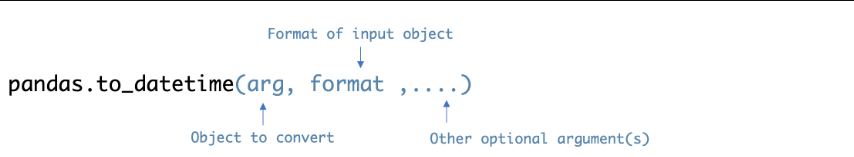

where:

* arg is the column to change to datetime
* format is how the string has been written i.e either day/month/year or year-month-day etc

  Refer to the date formatting resource

In [36]:
pd.to_datetime(tfl_df['Day'],format='%d/%m/%Y')

0      2010-07-30
1      2010-07-31
2      2010-08-01
3      2010-08-02
4      2010-08-03
          ...    
4076   2021-09-26
4077   2021-09-27
4078   2021-09-28
4079   2021-09-29
4080   2021-09-30
Name: Day, Length: 4081, dtype: datetime64[ns]

In [ ]:
# Now to save the change
tfl_df['Day']=pd.to_datetime(tfl_df['Day'],format='%d/%m/%Y')

In [37]:
tfl_df

,Day,Number of Bicycle Hires
0,2010-07-30,6897.0
1,2010-07-31,5564.0
2,2010-08-01,4303.0
3,2010-08-02,6642.0
4,2010-08-03,7966.0
...,...,...
4076,2021-09-26,45120.0
4077,2021-09-27,32167.0
4078,2021-09-28,32539.0
4079,2021-09-29,39889.0


<b> In my opinion, this is the preffered method.

<b> We can also do the converse by changing the datetime to string.

<b> This time we replace *<u>datetime.strptime* with *<u>datetime.strftime*

Because earlier we were parsing string to datetime hence 'p' but now we are transforming a string from a datetime hence 'f'



This conversion back to string is useful if you wish to display just month and year as deleting a few characters is easier to do if the object is a string.

In [58]:
import datetime as dt

In [60]:
tfl_df['Day'].dt.strftime('%m-%y')

# strftime is also a method in datetime modeule

1805    07-15
3592    05-20
3587    05-20
3606    06-20
3613    06-20
        ...  
151     12-10
905     01-13
555     02-12
141     12-10
142     12-10
Name: Day, Length: 4081, dtype: object

In [63]:
# Next let's try out the three month format %b and this time save it as a new column.

tfl_df['Month / Year']=tfl_df['Day'].dt.strftime('%b-%y')

In [62]:
tfl_df

,Day,Number of Bicycle Hires,Month / Year
1805,2015-07-09,73094.0,Jul-15
3592,2020-05-30,70170.0,May-20
3587,2020-05-25,67034.0,May-20
3606,2020-06-13,65045.0,Jun-20
3613,2020-06-20,64041.0,Jun-20
...,...,...,...
151,2010-12-28,3763.0,Dec-10
905,2013-01-20,3728.0,Jan-13
555,2012-02-05,3531.0,Feb-12
141,2010-12-18,2805.0,Dec-10


<b> If we wanted to extract years this code would have been useful

tfl['Year'] = tfl['Day'].dt.year

### Sorting values in  a dataframe

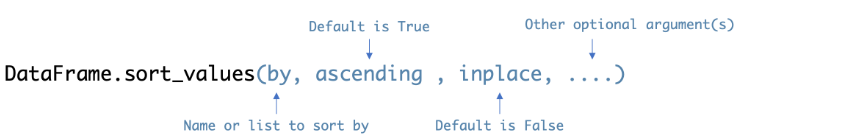

In [38]:
tfl_df

,Day,Number of Bicycle Hires
0,2010-07-30,6897.0
1,2010-07-31,5564.0
2,2010-08-01,4303.0
3,2010-08-02,6642.0
4,2010-08-03,7966.0
...,...,...
4076,2021-09-26,45120.0
4077,2021-09-27,32167.0
4078,2021-09-28,32539.0
4079,2021-09-29,39889.0


In [ ]:
# Let us sort by Number of Bicycle hires in descending order
tfl_df.sort_values(by='Number of Bicycle Hires',ascending=False,inplace=True)

In [41]:
tfl_df

,Day,Number of Bicycle Hires
1805,2015-07-09,73094.0
3592,2020-05-30,70170.0
3587,2020-05-25,67034.0
3606,2020-06-13,65045.0
3613,2020-06-20,64041.0
...,...,...
151,2010-12-28,3763.0
905,2013-01-20,3728.0
555,2012-02-05,3531.0
141,2010-12-18,2805.0


###  Transposing a dataframe

This makes all the rows become columns and vice versa.

*Syntax*

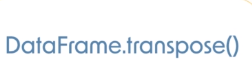

In [64]:
tfl_df.transpose()

,1805,3592,3587,3606,3613,1833,3593,3607,3963,3641,...,155,149,1251,2,150,151,905,555,141,142
Day,2015-07-09 00:00:00,2020-05-30 00:00:00,2020-05-25 00:00:00,2020-06-13 00:00:00,2020-06-20 00:00:00,2015-08-06 00:00:00,2020-05-31 00:00:00,2020-06-14 00:00:00,2021-06-05 00:00:00,2020-07-18 00:00:00,...,2011-01-01 00:00:00,2010-12-26 00:00:00,2014-01-01 00:00:00,2010-08-01 00:00:00,2010-12-27 00:00:00,2010-12-28 00:00:00,2013-01-20 00:00:00,2012-02-05 00:00:00,2010-12-18 00:00:00,2010-12-19 00:00:00
Number of Bicycle Hires,73094.0,70170.0,67034.0,65045.0,64041.0,63963.0,63116.0,57516.0,56900.0,56654.0,...,4555.0,4383.0,4327.0,4303.0,3971.0,3763.0,3728.0,3531.0,2805.0,2764.0
Month / Year,Jul-15,May-20,May-20,Jun-20,Jun-20,Aug-15,May-20,Jun-20,Jun-21,Jul-20,...,Jan-11,Dec-10,Jan-14,Aug-10,Dec-10,Dec-10,Jan-13,Feb-12,Dec-10,Dec-10


The index column becomes the header, so if we wanted for example to make the column 'Month / Year' the header we would have to make it the index column.

In [65]:
tfl_df.set_index(keys='Month / Year', inplace=True)

In [66]:
tfl_df

,Day,Number of Bicycle Hires
Month / Year,,
Jul-15,2015-07-09,73094.0
May-20,2020-05-30,70170.0
May-20,2020-05-25,67034.0
Jun-20,2020-06-13,65045.0
Jun-20,2020-06-20,64041.0
...,...,...
Dec-10,2010-12-28,3763.0
Jan-13,2013-01-20,3728.0
Feb-12,2012-02-05,3531.0


In [67]:
tfl_df.transpose()

Month / Year,Jul-15,May-20,May-20,Jun-20,Jun-20,Aug-15,May-20,Jun-20,Jun-21,Jul-20,...,Jan-11,Dec-10,Jan-14,Aug-10,Dec-10,Dec-10,Jan-13,Feb-12,Dec-10,Dec-10
Day,2015-07-09 00:00:00,2020-05-30 00:00:00,2020-05-25 00:00:00,2020-06-13 00:00:00,2020-06-20 00:00:00,2015-08-06 00:00:00,2020-05-31 00:00:00,2020-06-14 00:00:00,2021-06-05 00:00:00,2020-07-18 00:00:00,...,2011-01-01 00:00:00,2010-12-26 00:00:00,2014-01-01 00:00:00,2010-08-01 00:00:00,2010-12-27 00:00:00,2010-12-28 00:00:00,2013-01-20 00:00:00,2012-02-05 00:00:00,2010-12-18 00:00:00,2010-12-19 00:00:00
Number of Bicycle Hires,73094.0,70170.0,67034.0,65045.0,64041.0,63963.0,63116.0,57516.0,56900.0,56654.0,...,4555.0,4383.0,4327.0,4303.0,3971.0,3763.0,3728.0,3531.0,2805.0,2764.0


In [18]:
countries_df=pd.read_csv(r'C:\Users\ADMIN\Desktop\MY COURSES\PYTHON KNOWLEDGE\Course Resurces-Python for Data Analysis and Visualization\09 Pandas\08 Data Aggregation and Grouping\top_10_countries.csv')

In [73]:
countries_df

,Rank,Country / Dependency,Region,Population,% of world,Date
0,1,China,Asia,1412600000,17.80%,31-Dec-21
1,2,India,Asia,1386946912,17.50%,18-Jan-22
2,3,United States,Americas,333073186,4.20%,18-Jan-22
3,4,Indonesia,Asia,271350000,3.42%,31-Dec-20
4,5,Pakistan,Asia,225200000,2.84%,01-Jul-21
5,6,Brazil,Americas,214231641,2.70%,18-Jan-22
6,7,Nigeria,Africa,211401000,2.67%,01-Jul-21
7,8,Bangladesh,Asia,172062576,2.17%,18-Jan-22
8,9,Russia,Europe,146171015,1.84%,01-Jan-21
9,10,Mexico,Americas,126014024,1.59%,02-Mar-20


In [74]:
countries_df.drop(columns=['% of world','Date'],inplace=True)

In [75]:
countries_df

,Rank,Country / Dependency,Region,Population
0,1,China,Asia,1412600000
1,2,India,Asia,1386946912
2,3,United States,Americas,333073186
3,4,Indonesia,Asia,271350000
4,5,Pakistan,Asia,225200000
5,6,Brazil,Americas,214231641
6,7,Nigeria,Africa,211401000
7,8,Bangladesh,Asia,172062576
8,9,Russia,Europe,146171015
9,10,Mexico,Americas,126014024


In [76]:
countries_df.rename(columns={'Country / Dependency':'Country'},inplace=True)

In [77]:
countries_df

,Rank,Country,Region,Population
0,1,China,Asia,1412600000
1,2,India,Asia,1386946912
2,3,United States,Americas,333073186
3,4,Indonesia,Asia,271350000
4,5,Pakistan,Asia,225200000
5,6,Brazil,Americas,214231641
6,7,Nigeria,Africa,211401000
7,8,Bangladesh,Asia,172062576
8,9,Russia,Europe,146171015
9,10,Mexico,Americas,126014024


In [80]:
# Changing Country and Region colums from object to string datatypes.
countries_df[['Country','Region']]=countries_df[['Country','Region']].astype('string')

In [81]:
countries_df.dtypes

Rank                   int64
Country       string[python]
Region        string[python]
Population             int64
dtype: object

In [ ]:
sub_regions = ['Eastern Asia', 'Southern Asia', 'Northern America',
               'Southeast Asia', 'Southern Asia','Southern America',
               'Western Africa','Southern Asia','Eastern Europe','Central America']

countries_df['Sub Region']=sub_regions

In [84]:
countries_df.dtypes

Rank                   int64
Country       string[python]
Region        string[python]
Population             int64
Sub Region            object
dtype: object

In [85]:
# let us convert the Sub Region column to a be a string as well
countries_df['Sub Region']=countries_df['Sub Region'].astype('string')

In [86]:
countries_df.dtypes

Rank                   int64
Country       string[python]
Region        string[python]
Population             int64
Sub Region    string[python]
dtype: object

In [88]:
# To get a little bit more info about a dataframe, we can use the .info() method
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        10 non-null     int64 
 1   Country     10 non-null     string
 2   Region      10 non-null     string
 3   Population  10 non-null     int64 
 4   Sub Region  10 non-null     string
dtypes: int64(2), string(3)
memory usage: 528.0 bytes


### Re-ordering the columns of a dataset

*Syntax*

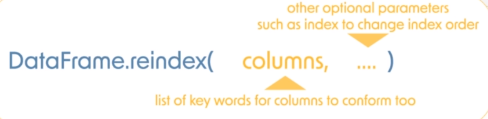

where columns=[column1,column2,....,columnn]

In [94]:
countries_df.reindex(columns=['Rank','Country','Region','Sub Region','Population'])

,Rank,Country,Region,Sub Region,Population
0,1,China,Asia,Eastern Asia,1412600000
1,2,India,Asia,Southern Asia,1386946912
2,3,United States,Americas,Northern America,333073186
3,4,Indonesia,Asia,Southeast Asia,271350000
4,5,Pakistan,Asia,Southern Asia,225200000
5,6,Brazil,Americas,Southern America,214231641
6,7,Nigeria,Africa,Western Africa,211401000
7,8,Bangladesh,Asia,Southern Asia,172062576
8,9,Russia,Europe,Eastern Europe,146171015
9,10,Mexico,Americas,Central America,126014024


In [95]:
# saving the change
countries_df=countries_df.reindex(columns=['Rank','Country','Region','Sub Region','Population'])

In [96]:
countries_df

,Rank,Country,Region,Sub Region,Population
0,1,China,Asia,Eastern Asia,1412600000
1,2,India,Asia,Southern Asia,1386946912
2,3,United States,Americas,Northern America,333073186
3,4,Indonesia,Asia,Southeast Asia,271350000
4,5,Pakistan,Asia,Southern Asia,225200000
5,6,Brazil,Americas,Southern America,214231641
6,7,Nigeria,Africa,Western Africa,211401000
7,8,Bangladesh,Asia,Southern Asia,172062576
8,9,Russia,Europe,Eastern Europe,146171015
9,10,Mexico,Americas,Central America,126014024


##  Data Aggregation and Grouping

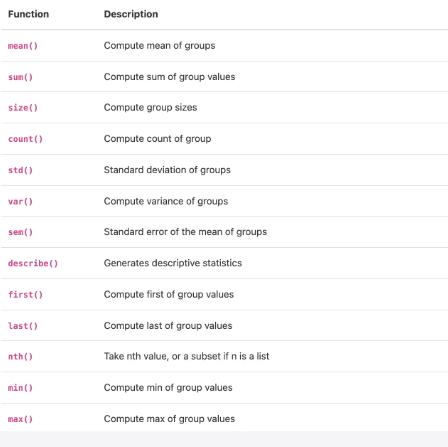

In [99]:
# let's sum the Population of the top 10 countries
sum(countries_df['Population'])

4499050354

In [98]:
# Alternatively
countries_df['Population'].sum()

4499050354

In [100]:
# The population mean of the top 10 countries
countries_df['Population'].mean()

449905035.4

In [109]:
# The populations standard deviation
countries_df['Population'].std()

504164358.8258898

In [101]:
# The max population
countries_df['Population'].max()

1412600000

In [107]:
# Confirming using the sorted function that the value stated is True
sorted(countries_df['Population'],reverse=True)

[1412600000,
 1386946912,
 333073186,
 271350000,
 225200000,
 214231641,
 211401000,
 172062576,
 146171015,
 126014024]

In [108]:
countries_df['Population'].min()

126014024

In [110]:
countries_df['Population'].count()

10

In [113]:
# Which works the same as len()
len(countries_df['Population'])

10

We can use the describe method to run all basic summary statistics on all the numeric columns or one column.

In [114]:
countries_df.describe()

,Rank,Population
count,10.00000,1.000000e+01
mean,5.50000,4.499050e+08
std,3.02765,5.041644e+08
min,1.00000,1.260140e+08
25%,3.25000,1.818972e+08
50%,5.50000,2.197158e+08
75%,7.75000,3.176424e+08
max,10.00000,1.412600e+09


In [116]:
countries_df['Population'].describe()

count    1.000000e+01
mean     4.499050e+08
std      5.041644e+08
min      1.260140e+08
25%      1.818972e+08
50%      2.197158e+08
75%      3.176424e+08
max      1.412600e+09
Name: Population, dtype: float64

<b>Some aggregate functions such as min and max work only strings and they arrange the elements in ascending and descending order respectively.

In [119]:
countries_df['Sub Region'].min()

'Central America'

In [121]:
countries_df['Sub Region'].max()

'Western Africa'

In [120]:
sorted(countries_df['Sub Region'])

['Central America',
 'Eastern Asia',
 'Eastern Europe',
 'Northern America',
 'Southeast Asia',
 'Southern America',
 'Southern Asia',
 'Southern Asia',
 'Southern Asia',
 'Western Africa']

<b>We can perform multiple summary statistics using the .agg(['stat1','stat2',..etc]) method

In [137]:
countries_df['Population'].agg(['sum','min'])

sum    4499050354
min     126014024
Name: Population, dtype: int64

In [139]:
# For multiple columns we assume the dictionary format
countries_df.agg({'Rank':['sum','mean'],'Population':['sum','mean']})

,Rank,Population
sum,55.0,4.499050e+09
mean,5.5,4.499050e+08


### Grouping data

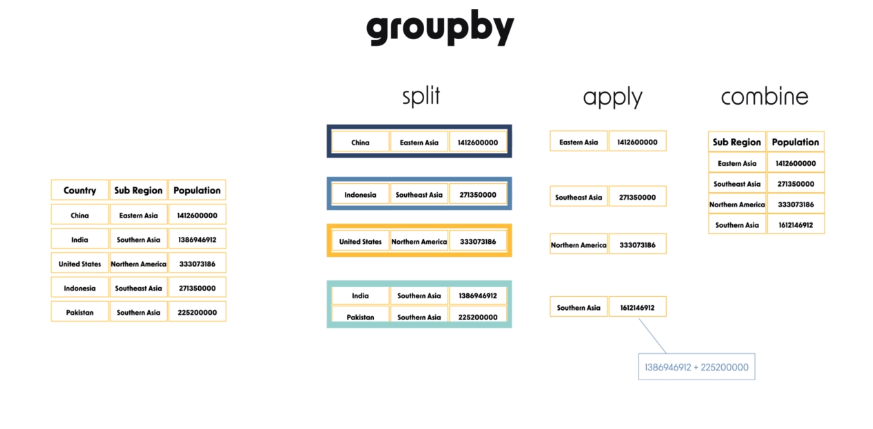

*Syntax*

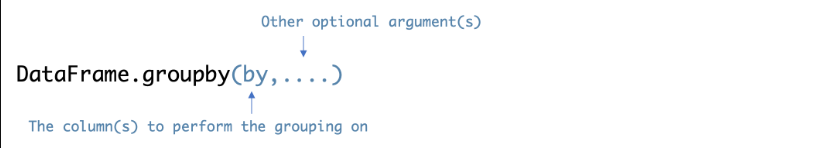

In [126]:
countries_df.groupby(by='Region')

In [127]:
# We can then apply aggregation to the created object
countries_df.groupby(by='Region').sum()

,Rank,Country,Sub Region,Population
Region,,,,
Africa,7,Nigeria,Western Africa,211401000
Americas,19,United States Brazil Mexico,Northern AmericaSouthern AmericaCentral America,673318851
Asia,20,China India Indonesia Pakistan Bangladesh,Eastern AsiaSouthern AsiaSoutheast AsiaSouther...,3468159488
Europe,9,Russia,Eastern Europe,146171015


The rank column has also been aggregated but that makes no sense. Thus, we can pre-filter the dataframe not to include that column.\

In [128]:
countries_df[['Region','Country','Sub Region', 'Population']].groupby(by='Region').sum()

,Country,Sub Region,Population
Region,,,
Africa,Nigeria,Western Africa,211401000
Americas,United States Brazil Mexico,Northern AmericaSouthern AmericaCentral America,673318851
Asia,China India Indonesia Pakistan Bangladesh,Eastern AsiaSouthern AsiaSoutheast AsiaSouther...,3468159488
Europe,Russia,Eastern Europe,146171015


In [129]:
countries_df[['Region','Population']].groupby(by='Region').mean()

,Population
Region,
Africa,211401000.0
Americas,224439617.0
Asia,693631897.6
Europe,146171015.0


In [130]:
countries_df[['Region','Population']].groupby(by='Region').max()

,Population
Region,
Africa,211401000
Americas,333073186
Asia,1412600000
Europe,146171015


In [131]:
countries_df[['Region','Population']].groupby(by='Region').min()

,Population
Region,
Africa,211401000
Americas,126014024
Asia,172062576
Europe,146171015


In [142]:
# Let us try grouping by mutliple columns.
# The order of the columns is important.
countries_df[['Region','Sub Region','Population']].groupby(by=['Region','Sub Region']).sum()

Population
Region   Sub Region                  
Africa   Western Africa     211401000
Americas Central America    126014024
         Northern America   333073186
         Southern America   214231641
Asia     Eastern Asia      1412600000
         Southeast Asia     271350000
         Southern Asia     1784209488
Europe   Eastern Europe     146171015

In [145]:
# Let us now try mutliple summary stats on the above code using the aggregagtion function.agg()
countries_df[['Region','Sub Region','Population']].groupby(by=['Region','Sub Region']).agg([sum,max])
#The qoutation marks are optional 'sum' 'max' would also have worked

Population            
                                  sum         max
Region   Sub Region                              
Africa   Western Africa     211401000   211401000
Americas Central America    126014024   126014024
         Northern America   333073186   333073186
         Southern America   214231641   214231641
Asia     Eastern Asia      1412600000  1412600000
         Southeast Asia     271350000   271350000
         Southern Asia     1784209488  1386946912
Europe   Eastern Europe     146171015   146171015

### Ordering dataframes 

We can order a dataframe by a certain column or multiple columns.

*Syntax*

>dataframe.sort_values(by='column_name',ascending=True/False)

In [21]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [30, 25, 35],
    'Salary': [50000, 60000, 55000]
})

In [22]:
df

,Name,Age,Salary
0,Alice,30,50000
1,Bob,25,60000
2,Charlie,35,55000


In [23]:
 df.sort_values(by='Age')

,Name,Age,Salary
1,Bob,25,60000
0,Alice,30,50000
2,Charlie,35,55000


In [25]:
# Order the DataFrame by the 'Age' column in descending order
df.sort_values(by=['Age','Name'], ascending=False)

,Name,Age,Salary
2,Charlie,35,55000
0,Alice,30,50000
1,Bob,25,60000


### Pivoting a dataframe

We can also pivot a dataframe just the way Excel pivots

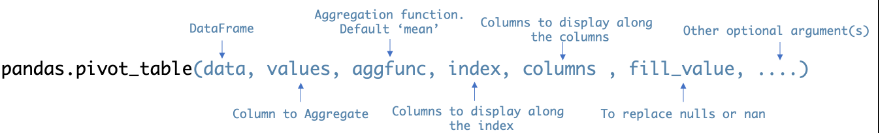

where:
* index will become the rows
*  columns will become the columns
*  fill value if set will be what is shown when the summary stat doesn't apply. You can set it to 0 for example.

In [146]:
countries_df

,Rank,Country,Region,Sub Region,Population
0,1,China,Asia,Eastern Asia,1412600000
1,2,India,Asia,Southern Asia,1386946912
2,3,United States,Americas,Northern America,333073186
3,4,Indonesia,Asia,Southeast Asia,271350000
4,5,Pakistan,Asia,Southern Asia,225200000
5,6,Brazil,Americas,Southern America,214231641
6,7,Nigeria,Africa,Western Africa,211401000
7,8,Bangladesh,Asia,Southern Asia,172062576
8,9,Russia,Europe,Eastern Europe,146171015
9,10,Mexico,Americas,Central America,126014024


In [149]:
pd.pivot_table(data=countries_df,values='Population',aggfunc=sum,index='Country',columns='Sub Region')

Sub Region,Central America,Eastern Asia,Eastern Europe,Northern America,Southeast Asia,Southern America,Southern Asia,Western Africa
Country,,,,,,,,
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,1.720626e+08,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,214231641.0,NaN,NaN
China,NaN,1.412600e+09,NaN,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,1.386947e+09,NaN
Indonesia,NaN,NaN,NaN,NaN,271350000.0,NaN,NaN,NaN
Mexico,126014024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211401000.0
Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,2.252000e+08,NaN
Russia,NaN,NaN,146171015.0,NaN,NaN,NaN,NaN,NaN


In [152]:
# Replacing the NaN values with 0
pd.pivot_table(data=countries_df,values='Population',aggfunc=sum,index='Country',columns='Sub Region',fill_value=0)

Sub Region,Central America,Eastern Asia,Eastern Europe,Northern America,Southeast Asia,Southern America,Southern Asia,Western Africa
Country,,,,,,,,
Bangladesh,0,0,0,0,0,0,172062576,0
Brazil,0,0,0,0,0,214231641,0,0
China,0,1412600000,0,0,0,0,0,0
India,0,0,0,0,0,0,1386946912,0
Indonesia,0,0,0,0,271350000,0,0,0
Mexico,126014024,0,0,0,0,0,0,0
Nigeria,0,0,0,0,0,0,0,211401000
Pakistan,0,0,0,0,0,0,225200000,0
Russia,0,0,146171015,0,0,0,0,0


The pivot_table is also a  dataframe method

In [154]:
# This time we exclude the data
countries_df.pivot_table(values='Population',aggfunc=sum,index='Country',columns='Sub Region',fill_value=0)

Sub Region,Central America,Eastern Asia,Eastern Europe,Northern America,Southeast Asia,Southern America,Southern Asia,Western Africa
Country,,,,,,,,
Bangladesh,0,0,0,0,0,0,172062576,0
Brazil,0,0,0,0,0,214231641,0,0
China,0,1412600000,0,0,0,0,0,0
India,0,0,0,0,0,0,1386946912,0
Indonesia,0,0,0,0,271350000,0,0,0
Mexico,126014024,0,0,0,0,0,0,0
Nigeria,0,0,0,0,0,0,0,211401000
Pakistan,0,0,0,0,0,0,225200000,0
Russia,0,0,146171015,0,0,0,0,0


Just like groupby we can index on multiple columns.

In [156]:
countries_df.pivot_table(values='Population',aggfunc=sum,index=['Region','Sub Region'])

Population
Region   Sub Region                  
Africa   Western Africa     211401000
Americas Central America    126014024
         Northern America   333073186
         Southern America   214231641
Asia     Eastern Asia      1412600000
         Southeast Asia     271350000
         Southern Asia     1784209488
Europe   Eastern Europe     146171015

This looks exactly what the groupby returns

However, the full power of a pivot table should display something like this:

In [158]:
countries_df.pivot_table(values='Population',aggfunc=sum,index=['Region','Sub Region'],columns='Country',fill_value=0)

Country                     Bangladesh      Brazil          China          \
Region   Sub Region                                                         
Africa   Western Africa                 0               0               0   
Americas Central America                0               0               0   
         Northern America               0               0               0   
         Southern America               0       214231641               0   
Asia     Eastern Asia                   0               0      1412600000   
         Southeast Asia                 0               0               0   
         Southern Asia          172062576               0               0   
Europe   Eastern Europe                 0               0               0   

Country                     India           Indonesia       Mexico         \
Region   Sub Region                                                         
Africa   Western Africa                 0               0               0   
Americas Central America                0               0       126014024   
         Northern America               0               0               0   
         Southern America               0               0               0   
Asia     Eastern Asia                   0               0               0   
         Southeast Asia                 0       271350000               0   
         Southern Asia         1386946912               0               0   
Europe   Eastern Europe                 0               0               0   

Country                     Nigeria         Pakistan        Russia         \
Region   Sub Region                                                         
Africa   Western Africa         211401000               0               0   
Americas Central America                0               0               0   
         Northern America               0               0               0   
         Southern America               0               0               0   
Asia     Eastern Asia                   0               0               0   
         Southeast Asia                 0               0               0   
         Southern Asia                  0       225200000               0   
Europe   Eastern Europe                 0               0       146171015   

Country                     United States  
Region   Sub Region                        
Africa   Western Africa                 0  
Americas Central America                0  
         Northern America       333073186  
         Southern America               0  
Asia     Eastern Asia                   0  
         Southeast Asia                 0  
         Southern Asia                  0  
Europe   Eastern Europe                 0

In [164]:
# However, this looks much cleaner
countries_df.pivot_table(values='Population',aggfunc=sum,index=['Region','Sub Region','Country'])

Population
Region   Sub Region       Country                   
Africa   Western Africa    Nigeria         211401000
Americas Central America   Mexico          126014024
         Northern America  United States   333073186
         Southern America  Brazil          214231641
Asia     Eastern Asia      China          1412600000
         Southeast Asia    Indonesia       271350000
         Southern Asia     Bangladesh      172062576
                           India          1386946912
                           Pakistan        225200000
Europe   Eastern Europe    Russia          146171015

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
employees = ['employee1', '  employee2', 'employee3  ', 'employee4  ','employee5', 'employee6', 'employee7', 'employee8']
position = ['analyst', 'manager', 'analyst', 'analyst', 'manager','senior manager','manager',None]
salary = [30000,56000,28000,33000,60000,75000, None, None]
columns = ['employee', 'position', 'salary']

In [3]:
df = pd.DataFrame(data = list(zip(employees, position, salary)), columns=columns)

# Recall: zip takes elements from different iterable objects(i.e tuples) and merges them into one tuple.
# eg data = ((1,2,5),(4,2,4),(6,7,9}),(3,2,4]),(3,3,2))

In [4]:
df

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,NaN
7,employee8,None,NaN


In [5]:
# For a start, let's examine the employee column
df['employee']

0      employee1
1      employee2
2    employee3  
3    employee4  
4      employee5
5      employee6
6      employee7
7      employee8
Name: employee, dtype: object

Some of the entries have extra white spaces.

In [6]:
# Since the column is an object we can apply string methods to it.
# Recall: the strip method as described under the strings file removes both trailing and leading white space.

df['employee']=df['employee'].apply(lambda x: x.strip())

In [7]:
df['employee']

0    employee1
1    employee2
2    employee3
3    employee4
4    employee5
5    employee6
6    employee7
7    employee8
Name: employee, dtype: object

### Null/Missing values

#### Checking for missing values

We can check for null values using .isnull()

*Syntax*
> dataframe.isnull()

    It returns True if the entry is null 

In [8]:
df.isnull()

,employee,position,salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,True
7,False,True,True


In [9]:
# NaN which is an alias for null also returns the same values 
df.isna()

,employee,position,salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,True
7,False,True,True


#### Dropping missing values

You can drop null values using the following code:

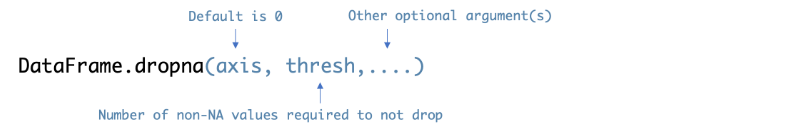

The above code drops entire rows that have null values. Hence the importance of using the thresh arguement which lets you set a limit that if a rows has the specified n non-values then it cannot be dropped.

In [11]:
df

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,NaN
7,employee8,None,NaN


In [12]:
df.dropna()

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0


In [13]:
# let us set the threshold to 2
df.dropna(thresh=2)

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,NaN


In [18]:
# To drop all the columns that contain missing values, we just change the axis
df.dropna(axis=1)

,employee
0,employee1
1,employee2
2,employee3
3,employee4
4,employee5
5,employee6
6,employee7
7,employee8


All columns with missing values are dropped.

In [20]:
# let us set a threshold. Each column has 8 values so let us set the threshold to be 7
df.dropna(axis=1,thresh=7)

,employee,position
0,employee1,analyst
1,employee2,manager
2,employee3,analyst
3,employee4,analyst
4,employee5,manager
5,employee6,senior manager
6,employee7,manager
7,employee8,None


All columns that don't have at least 7 non-null values are dropped.

#### Filling in missing values

*Syntax*

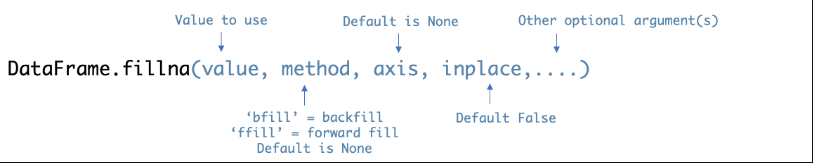

where:

* ffill- fills the blank with the value of the above row
  
* bfill which fills the blank with the next non-null value in the current row

In [27]:
df.fillna('no data')

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,no data
7,employee8,no data,no data


In [28]:
# But for data analysis it is advisable to make the nulls 0
df.fillna(0)

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,0.0
7,employee8,0,0.0


In [29]:
# Or use ffill 
df.fillna(method='ffill')

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,75000.0
7,employee8,manager,75000.0


In [33]:
df['salary'].mean()

47000.0

In [31]:
# We can also fill the blank salaries with the mean salary value
df['salary']=df['salary'].fillna(df['salary'].mean())

In [32]:
df

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,47000.0
7,employee8,None,47000.0


### Duplicate values

#### Checking the unique and number of unique elements in a column

We use the .unique() and .nunique() methods respectively.

In [22]:
df

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,NaN
7,employee8,None,NaN


In [24]:
df['position'].unique()

array(['analyst', 'manager', 'senior manager', None], dtype=object)

In [26]:
df['position'].nunique()

3

#### Dropping duplicate values

Checking if a column has a unique/non-duplicated columns can be done using .unique(). Now we wish to drop the duplicates.

*Syntax*

>dataframe.drop_duplicates() # drops dups in entire dataframe

>dataframe.drop_duplicates(subset=['column1, column2']) # drops dups in certain columns

In [16]:
df

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,NaN
7,employee8,None,NaN


In [15]:
df.drop_duplicates()

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
2,employee3,analyst,28000.0
3,employee4,analyst,33000.0
4,employee5,manager,60000.0
5,employee6,senior manager,75000.0
6,employee7,manager,NaN
7,employee8,None,NaN


In [17]:
df.drop_duplicates(subset='position')

,employee,position,salary
0,employee1,analyst,30000.0
1,employee2,manager,56000.0
5,employee6,senior manager,75000.0
7,employee8,None,NaN


## Combining Dataframes

In [52]:
import pandas as pd
import numpy as np

*Syntax*

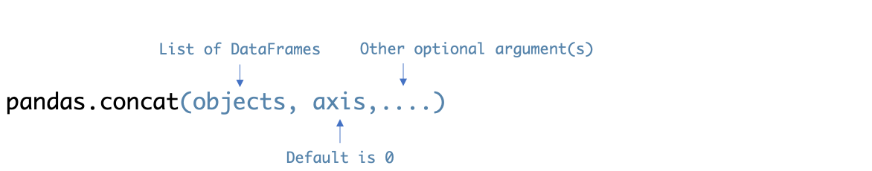

In [53]:
data1 = np.full((5,5),1)
index1 = (0,1,2,3,4)
columns1 = (0,1,2,3,4)

In [54]:
df1 = pd.DataFrame(data1, index1, columns1)

In [55]:
data2 = np.full((5,5),2)
index2 = (5,6,7,8,9)
columns2 = (0,1,2,3,4)

In [56]:
df2 = pd.DataFrame(data2, index2, columns2)

In [57]:
data3 = np.full((5,5),3)
index3 = (0,1,2,3,4)
columns3 = (5,6,7,8,9)

In [58]:
df3 = pd.DataFrame(data3, index3, columns3)

In [42]:
df1

,0,1,2,3,4
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [43]:
df2

,0,1,2,3,4
5,2,2,2,2,2
6,2,2,2,2,2
7,2,2,2,2,2
8,2,2,2,2,2
9,2,2,2,2,2


In [44]:
df3

,5,6,7,8,9
0,3,3,3,3,3
1,3,3,3,3,3
2,3,3,3,3,3
3,3,3,3,3,3
4,3,3,3,3,3


In [46]:
# df1 and df2 have the same columns but different row(row-indexes) thus a merge on the 0-axis makes sense
pd.concat([df1,df2])

,0,1,2,3,4
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
5,2,2,2,2,2
6,2,2,2,2,2
7,2,2,2,2,2
8,2,2,2,2,2
9,2,2,2,2,2


In [47]:
# if we chose axis 1, it would look like this
pd.concat([df1,df2],axis=1)

,0,1,2,3,4,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0
6,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0
7,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0
8,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0
9,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0


In [49]:
# Let us a merge df1 and df3. Again, its sensible to merge on columns
pd.concat([df1,df3],axis=1)

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,3,3,3,3,3
1,1,1,1,1,1,3,3,3,3,3
2,1,1,1,1,1,3,3,3,3,3
3,1,1,1,1,1,3,3,3,3,3
4,1,1,1,1,1,3,3,3,3,3


In [59]:
pd.concat([df1,df3],axis=0)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
1,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
2,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
3,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0


In [61]:
# We chose to ignore the index column of the second dataframe 
pd.concat([df1,df3],axis=0, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
6,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
7,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
8,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
9,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0


In [62]:
# We can sort
pd.concat([df1,df3],axis=0, ignore_index=True,sort=True)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
6,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
7,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
8,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0
9,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0


### Joining relation dataframes using a key column(s)

There are three types of joins we can do for relational dataframes

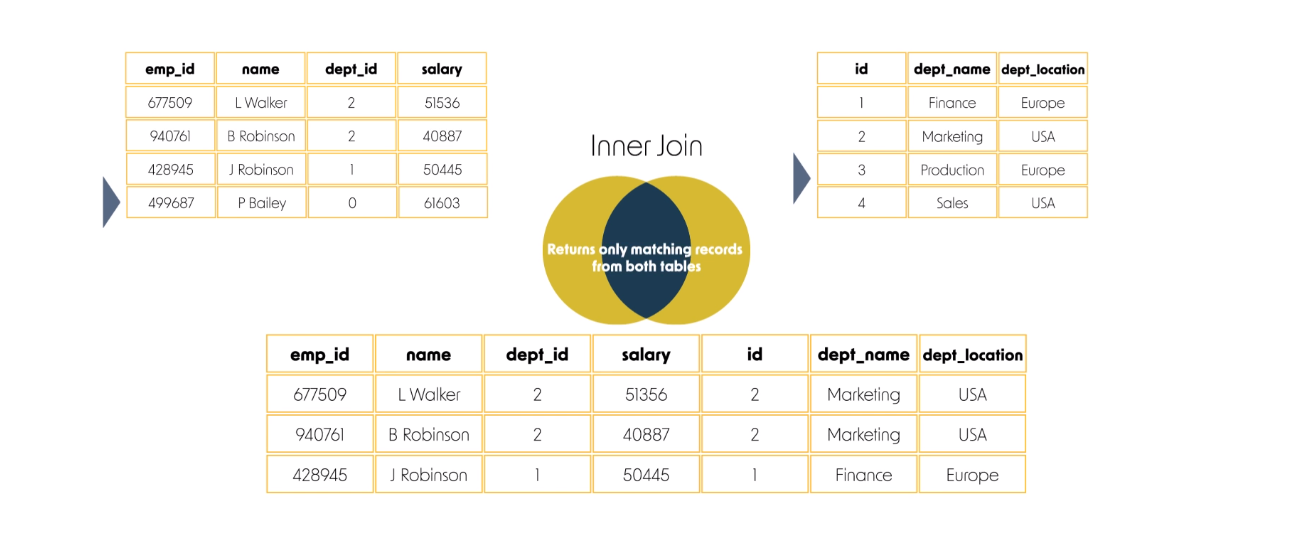

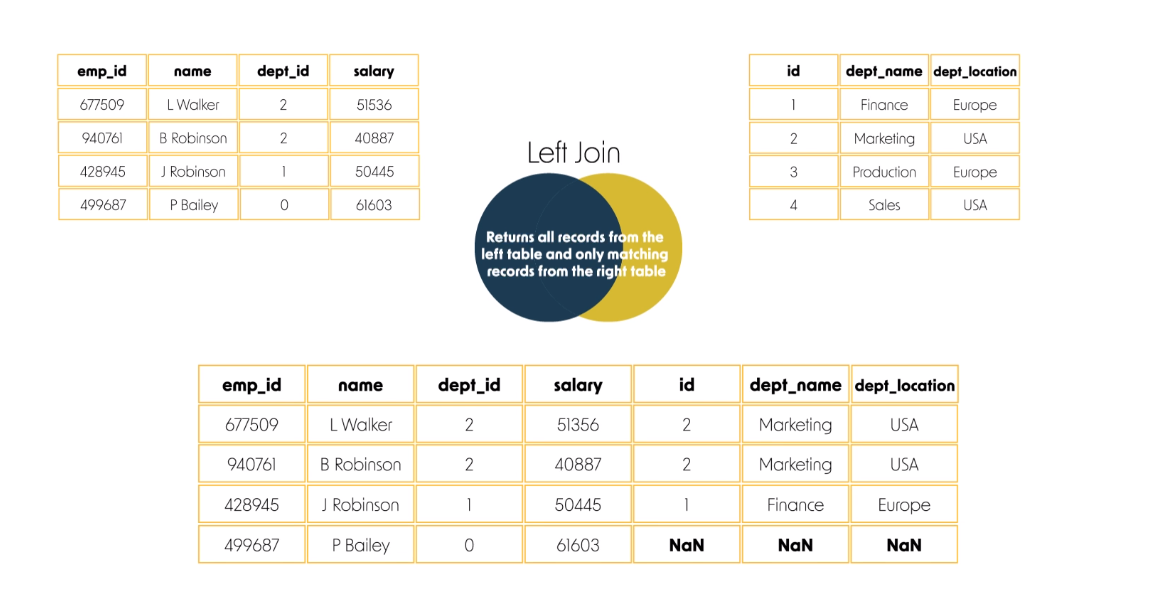

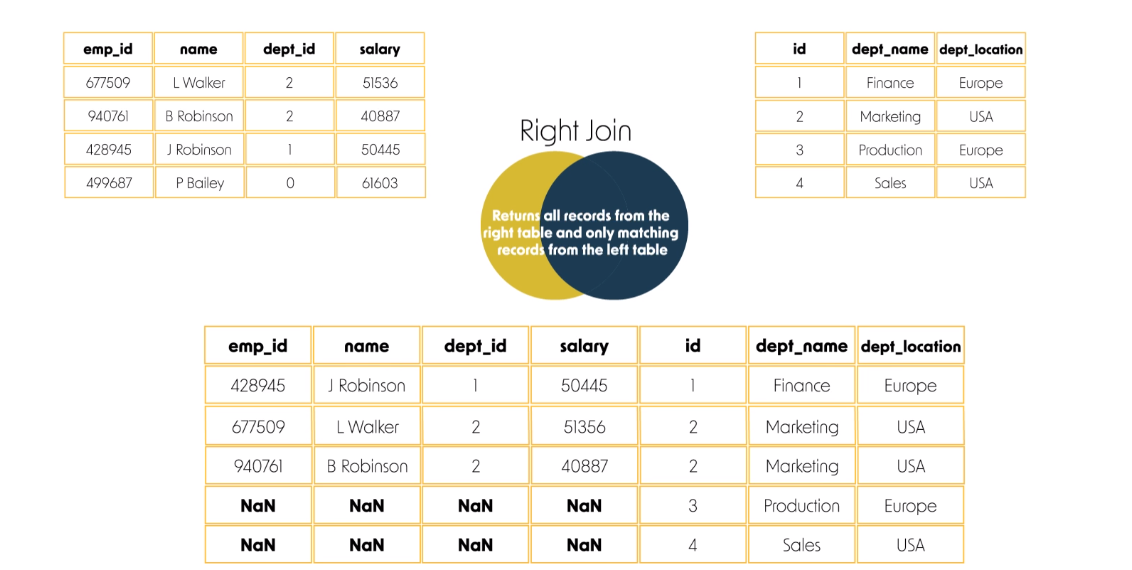

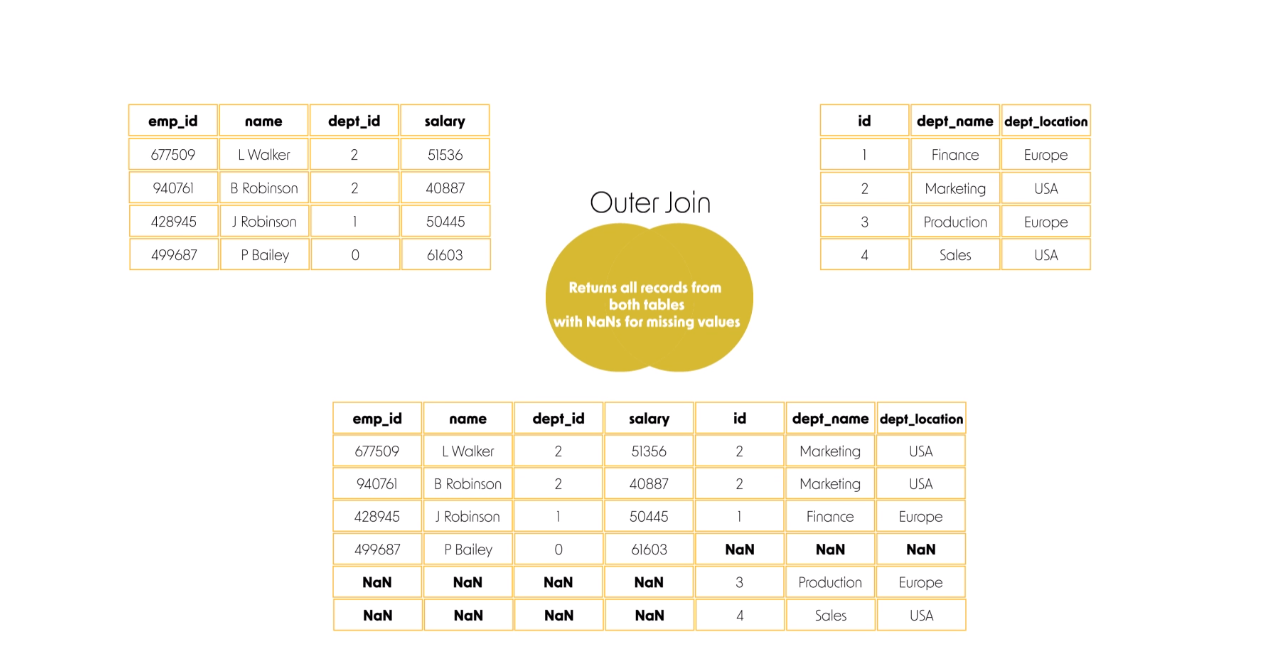

If a table had duplicate values in the key column, then the merge would look like this.

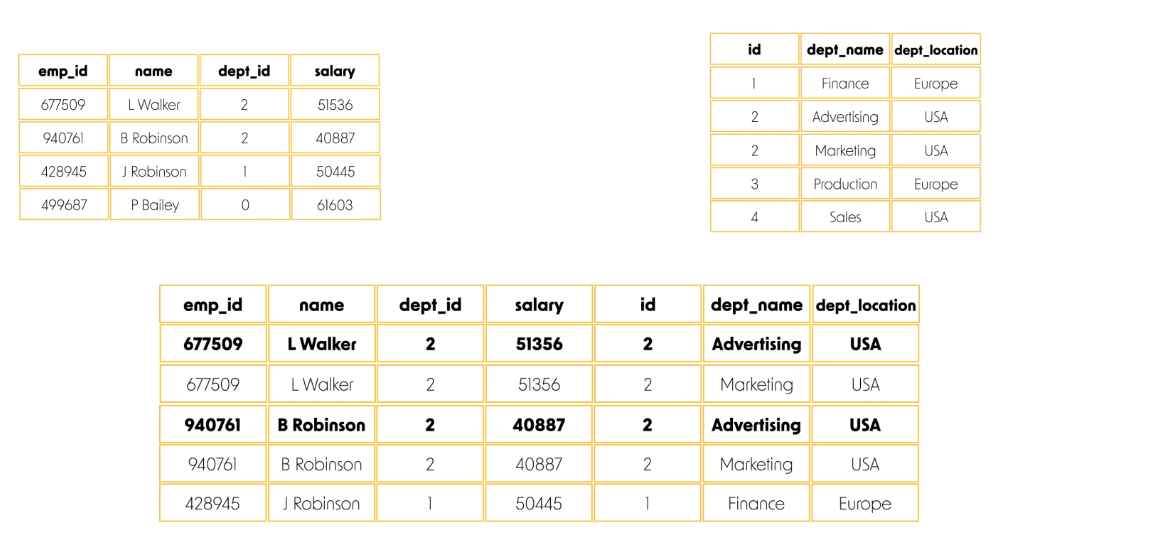

In [4]:
# pip install xlrd
# Run the above code first to install dependecies necessary for an excel import

In [3]:
emp = pd.read_excel('C:\\Users\\ADMIN\Desktop\\MY COURSES\\PYTHON KNOWLEDGE\\Course Resurces-Python for Data Analysis and Visualization\\09 Pandas\\10 Combining DataFrames\\employees_hr.xls',sheet_name='employees')

In [5]:
dept = pd.read_excel(r'C:\Users\ADMIN\Desktop\MY COURSES\PYTHON KNOWLEDGE\Course Resurces-Python for Data Analysis and Visualization\09 Pandas\10 Combining DataFrames\employees_hr.xls',sheet_name='departments')

In [6]:
emp

,emp_id,first_name,last_name,dept_id,salary
0,677509,Lois,Walker,2,51356
1,940761,Brenda,Robinson,2,40887
2,428945,Joe,Robinson,1,50445
3,408351,Diane,Evans,5,41728
4,193819,Benjamin,Russell,5,47202
5,499687,Patrick,Bailey,0,61603
6,539712,Nancy,Baker,4,57919
7,380086,Carol,Murphy,4,64590
8,477616,Frances,Young,5,32196
9,329752,Lillian,Brown,4,60078


In [7]:
dept

,id,dept_name,dept_location
0,0,Human Resources,USA
1,1,Finance,Europe
2,2,Marketing,USA
3,3,Production,Europe
4,4,Sales,USA
5,5,R&D,USA
6,6,Customer Service,USA


*Syntax*

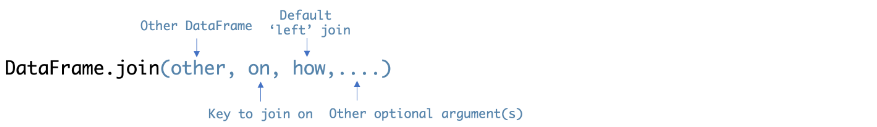

<b>The *<u>on* arguement belongs to the external dataframe NOT the other dataframe!

    The column key is just what relates the two dataframes but actually join occurs on the index of the other dataframe so you must change the index of the other dataframe to be the column key you want to join on!!


In [11]:
# A left join 
emp.join(dept.set_index('id'),on='dept_id')

,emp_id,first_name,last_name,dept_id,salary,dept_name,dept_location
0,677509,Lois,Walker,2,51356,Marketing,USA
1,940761,Brenda,Robinson,2,40887,Marketing,USA
2,428945,Joe,Robinson,1,50445,Finance,Europe
3,408351,Diane,Evans,5,41728,R&D,USA
4,193819,Benjamin,Russell,5,47202,R&D,USA
5,499687,Patrick,Bailey,0,61603,Human Resources,USA
6,539712,Nancy,Baker,4,57919,Sales,USA
7,380086,Carol,Murphy,4,64590,Sales,USA
8,477616,Frances,Young,5,32196,R&D,USA
9,329752,Lillian,Brown,4,60078,Sales,USA


In [34]:
#Let us re-order such that the dept_id becomes the first column
emp.join(dept.set_index('id'),on='dept_id').reindex(columns=['dept_id','dept_name','emp_id','first_name','last_name','salary',
                                                             'dept_location'])

,dept_id,dept_name,emp_id,first_name,last_name,salary,dept_location
0,2,Marketing,677509,Lois,Walker,51356,USA
1,2,Marketing,940761,Brenda,Robinson,40887,USA
2,1,Finance,428945,Joe,Robinson,50445,Europe
3,5,R&D,408351,Diane,Evans,41728,USA
4,5,R&D,193819,Benjamin,Russell,47202,USA
5,0,Human Resources,499687,Patrick,Bailey,61603,USA
6,4,Sales,539712,Nancy,Baker,57919,USA
7,4,Sales,380086,Carol,Murphy,64590,USA
8,5,R&D,477616,Frances,Young,32196,USA
9,4,Sales,329752,Lillian,Brown,60078,USA


In [33]:
# We can then order by dept_id
emp.join(dept.set_index('id'),on='dept_id').reindex(columns=['dept_id','dept_name','emp_id','first_name','last_name','salary',
                                                             'dept_location']).sort_values(['dept_id'])

,dept_id,dept_name,emp_id,first_name,last_name,salary,dept_location
5,0,Human Resources,499687,Patrick,Bailey,61603,USA
14,0,Human Resources,333476,Mary,Wilson,54362,USA
12,0,Human Resources,456747,Roy,Griffin,54965,USA
11,0,Human Resources,621833,Gregory,Edwards,38068,USA
2,1,Finance,428945,Joe,Robinson,50445,Europe
13,1,Finance,278556,Richard,Mitchell,78451,Europe
0,2,Marketing,677509,Lois,Walker,51356,USA
1,2,Marketing,940761,Brenda,Robinson,40887,USA
16,3,Production,134841,Donna,Brown,44665,Europe
15,3,Production,218791,Aaron,Price,41690,Europe


In [81]:
# We can fix the messy index using reset_index
emp.join(dept.set_index('id'),on='dept_id').reindex(columns=['dept_id','dept_name','emp_id','first_name','last_name','salary',
                                                             'dept_location']).sort_values(['dept_id']).reset_index(drop=True)

,dept_id,dept_name,emp_id,first_name,last_name,salary,dept_location
0,0,Human Resources,499687,Patrick,Bailey,61603,USA
1,0,Human Resources,333476,Mary,Wilson,54362,USA
2,0,Human Resources,456747,Roy,Griffin,54965,USA
3,0,Human Resources,621833,Gregory,Edwards,38068,USA
4,1,Finance,428945,Joe,Robinson,50445,Europe
5,1,Finance,278556,Richard,Mitchell,78451,Europe
6,2,Marketing,677509,Lois,Walker,51356,USA
7,2,Marketing,940761,Brenda,Robinson,40887,USA
8,3,Production,134841,Donna,Brown,44665,Europe
9,3,Production,218791,Aaron,Price,41690,Europe


In [32]:
# To avoid confusion, we can change the index to be dept_id

emp.join(dept.set_index('id'),on='dept_id').reindex(columns=['dept_id','dept_name','emp_id','first_name','last_name','salary',
                                                             'dept_location']).sort_values(['dept_id']).set_index('dept_id')

,dept_name,emp_id,first_name,last_name,salary,dept_location
dept_id,,,,,,
0,Human Resources,499687,Patrick,Bailey,61603,USA
0,Human Resources,333476,Mary,Wilson,54362,USA
0,Human Resources,456747,Roy,Griffin,54965,USA
0,Human Resources,621833,Gregory,Edwards,38068,USA
1,Finance,428945,Joe,Robinson,50445,Europe
1,Finance,278556,Richard,Mitchell,78451,Europe
2,Marketing,677509,Lois,Walker,51356,USA
2,Marketing,940761,Brenda,Robinson,40887,USA
3,Production,134841,Donna,Brown,44665,Europe


In [37]:
# Let us try an outer join
emp.join(dept.set_index('id'),on='dept_id',how='outer').reindex(columns=['dept_id','dept_name','emp_id','first_name','last_name','salary',
                                                             'dept_location']).sort_values(['dept_id']).set_index('dept_id')

,dept_name,emp_id,first_name,last_name,salary,dept_location
dept_id,,,,,,
0,Human Resources,621833.0,Gregory,Edwards,38068.0,USA
0,Human Resources,333476.0,Mary,Wilson,54362.0,USA
0,Human Resources,456747.0,Roy,Griffin,54965.0,USA
0,Human Resources,499687.0,Patrick,Bailey,61603.0,USA
1,Finance,428945.0,Joe,Robinson,50445.0,Europe
1,Finance,278556.0,Richard,Mitchell,78451.0,Europe
2,Marketing,677509.0,Lois,Walker,51356.0,USA
2,Marketing,940761.0,Brenda,Robinson,40887.0,USA
3,Production,218791.0,Aaron,Price,41690.0,Europe


In [39]:
# We can decongest stuff by just listing only the columns we need.
emp.join(dept.set_index('id'),on='dept_id',how='outer').reindex(columns=['dept_id','dept_name','emp_id','first_name',
                                                             'dept_location']).sort_values(['dept_id']).set_index('dept_id')

,dept_name,emp_id,first_name,dept_location
dept_id,,,,
0,Human Resources,621833.0,Gregory,USA
0,Human Resources,333476.0,Mary,USA
0,Human Resources,456747.0,Roy,USA
0,Human Resources,499687.0,Patrick,USA
1,Finance,428945.0,Joe,Europe
1,Finance,278556.0,Richard,Europe
2,Marketing,677509.0,Lois,USA
2,Marketing,940761.0,Brenda,USA
3,Production,218791.0,Aaron,Europe


#### <b> Alternate method of joining relational tables

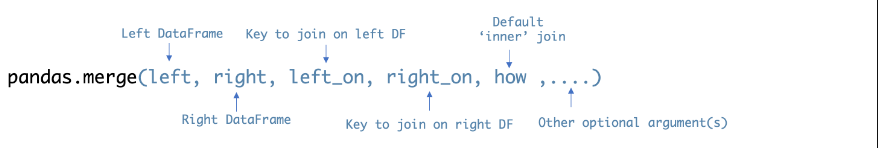

<B> The major advantage of using this method in stead is that the right dataframe does not need to have its index as the key

In [48]:
# lets inner join the emp as the right table and dept table as the left table
pd.merge(left=emp,right=dept,left_on='dept_id',right_on='id')

,emp_id,first_name,last_name,dept_id,salary,id,dept_name,dept_location
0,677509,Lois,Walker,2,51356,2,Marketing,USA
1,940761,Brenda,Robinson,2,40887,2,Marketing,USA
2,428945,Joe,Robinson,1,50445,1,Finance,Europe
3,278556,Richard,Mitchell,1,78451,1,Finance,Europe
4,408351,Diane,Evans,5,41728,5,R&D,USA
5,193819,Benjamin,Russell,5,47202,5,R&D,USA
6,477616,Frances,Young,5,32196,5,R&D,USA
7,726264,Carl,Collins,5,41362,5,R&D,USA
8,499687,Patrick,Bailey,0,61603,0,Human Resources,USA
9,621833,Gregory,Edwards,0,38068,0,Human Resources,USA


In [64]:
#left join in stead
pd.merge(left=emp,right=dept,left_on='dept_id',right_on='id',how='left')

,emp_id,first_name,last_name,dept_id,salary,id,dept_name,dept_location
0,677509,Lois,Walker,2,51356,2.0,Marketing,USA
1,940761,Brenda,Robinson,2,40887,2.0,Marketing,USA
2,428945,Joe,Robinson,1,50445,1.0,Finance,Europe
3,408351,Diane,Evans,5,41728,5.0,R&D,USA
4,193819,Benjamin,Russell,5,47202,5.0,R&D,USA
5,499687,Patrick,Bailey,0,61603,0.0,Human Resources,USA
6,539712,Nancy,Baker,4,57919,4.0,Sales,USA
7,380086,Carol,Murphy,4,64590,4.0,Sales,USA
8,477616,Frances,Young,5,32196,5.0,R&D,USA
9,329752,Lillian,Brown,4,60078,4.0,Sales,USA


## Windowing operations

Useful for getting running/cummulative totals.

In [67]:
import pandas as pd
import datetime as dt

In [68]:
tfl_df = pd.read_csv(r'C:\Users\ADMIN\Desktop\MY COURSES\PYTHON KNOWLEDGE\Course Resurces-Python for Data Analysis and Visualization\09 Pandas\11 Windowing Operations\tfl-daily-cycle-hires.csv')

In [70]:
tfl_df

,Day,Number of Bicycle Hires
0,30/09/2021,34070
1,29/09/2021,39889
2,28/09/2021,32539
3,27/09/2021,32167
4,26/09/2021,45120
...,...,...
4076,03/08/2010,7966
4077,02/08/2010,6642
4078,01/08/2010,4303
4079,31/07/2010,5564


In [71]:
# Converting the 'Day' column type to datetime
tfl_df['Day']=pd.to_datetime(tfl_df['Day'], format='%d/%m/%Y')

In [72]:
# Sorting the values in ascending date order
tfl_df.sort_values('Day', inplace=True)

In [73]:
# Extracting the year and  month in the format YYYY-MM
tfl_df['Day']=tfl_df['Day'].dt.strftime('%Y-%m')

In [74]:
# Renaming the 'Day' column to 'Month / Year'
tfl_df.rename({'Day':'Month Year'}, axis=1, inplace=True)

In [95]:
tfl_df

,Month Year,Number of Bicycle Hires
4080,2010-07,6897
4079,2010-07,5564
4078,2010-08,4303
4077,2010-08,6642
4076,2010-08,7966
...,...,...
4,2021-09,45120
3,2021-09,32167
2,2021-09,32539
1,2021-09,39889


In [82]:
# Grouping on the 'Month Year' column with the sum aggregation. Using tail to return the latest 12 months
# Final step is to reset the index so that 'Month Year' is not left as an index but returns to being a regular column
tfl_12_month = tfl_df.groupby(by='Month Year').sum().tail(12).reset_index()

In [83]:
tfl_12_month

,Month Year,Number of Bicycle Hires
0,2020-10,848233
1,2020-11,760245
2,2020-12,589091
3,2021-01,409761
4,2021-02,510806
5,2021-03,748233
6,2021-04,943328
7,2021-05,921413
8,2021-06,1183119
9,2021-07,1167625


### expanding

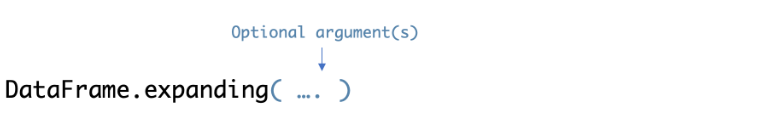

In [84]:
tfl_12_month['Number of Bicycle Hires'].expanding()

Expanding [min_periods=1,axis=0,method=single]

In [85]:
tfl_12_month['Number of Bicycle Hires'].expanding().sum()

0       848233.0
1      1608478.0
2      2197569.0
3      2607330.0
4      3118136.0
5      3866369.0
6      4809697.0
7      5731110.0
8      6914229.0
9      8081854.0
10     9192561.0
11    10412431.0
Name: Number of Bicycle Hires, dtype: float64

We get a cummulative sum down the years

In [86]:
# Assigning it a column
tfl_12_month['cumulative'] =  tfl_12_month['Number of Bicycle Hires'].expanding().sum()

In [88]:
tfl_12_month

,Month Year,Number of Bicycle Hires,cumulative
0,2020-10,848233,848233.0
1,2020-11,760245,1608478.0
2,2020-12,589091,2197569.0
3,2021-01,409761,2607330.0
4,2021-02,510806,3118136.0
5,2021-03,748233,3866369.0
6,2021-04,943328,4809697.0
7,2021-05,921413,5731110.0
8,2021-06,1183119,6914229.0
9,2021-07,1167625,8081854.0


### rolling

Performs the same task, however, you MUST specify specific rows in the windows arguement.

*Syntax*

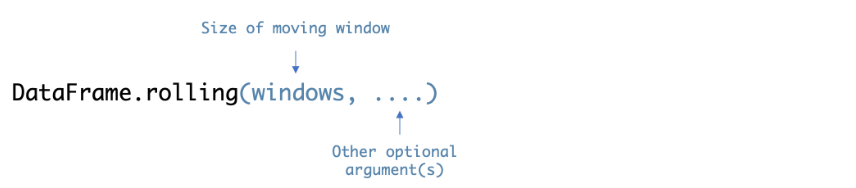

In [97]:
tfl_12_month

,Month Year,Number of Bicycle Hires,cumulative
0,2020-10,848233,848233.0
1,2020-11,760245,1608478.0
2,2020-12,589091,2197569.0
3,2021-01,409761,2607330.0
4,2021-02,510806,3118136.0
5,2021-03,748233,3866369.0
6,2021-04,943328,4809697.0
7,2021-05,921413,5731110.0
8,2021-06,1183119,6914229.0
9,2021-07,1167625,8081854.0


We will create a 3-month and a 6-month rolling column.

In [98]:
tfl_12_month['Rolling Avg 3'] = tfl_12_month['Number of Bicycle Hires'].rolling(3).sum()

In [99]:
tfl_12_month['Rolling Avg 6'] = tfl_12_month['Number of Bicycle Hires'].rolling(6).sum()

In [100]:
tfl_12_month

,Month Year,Number of Bicycle Hires,cumulative,Rolling Avg 3,Rolling Avg 6
0,2020-10,848233,848233.0,NaN,NaN
1,2020-11,760245,1608478.0,NaN,NaN
2,2020-12,589091,2197569.0,2197569.0,NaN
3,2021-01,409761,2607330.0,1759097.0,NaN
4,2021-02,510806,3118136.0,1509658.0,NaN
5,2021-03,748233,3866369.0,1668800.0,3866369.0
6,2021-04,943328,4809697.0,2202367.0,3961464.0
7,2021-05,921413,5731110.0,2612974.0,4122632.0
8,2021-06,1183119,6914229.0,3047860.0,4716660.0
9,2021-07,1167625,8081854.0,3272157.0,5474524.0


* The sum of every 2 values before and the current value is calculated for the Rolling  Avg 3

* The sum of every 5 values before and the current value is calculated for the Rolling  Avg 6